<a href="https://colab.research.google.com/github/chizhenn/DS-ML-Projects/blob/main/Company's_Bankruptcy_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Group Project**
Machine Learning in Finance: Company's Bankruptcy Prediction Model

Dataset:
https://www.kaggle.com/datasets/utkarshx27/american-companies-bankruptcy-prediction-dataset/data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import sklearn.model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/american_bankruptcy.csv')
df.head(5)
#display the first five rows of the dataset to get an initial sense of the data

Mounted at /content/drive


,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


* To gather basic information about the dataset, such as data types, missing values, and summary statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  int64  
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

In [ ]:
df.describe()

,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,2007.506317,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,5.742768,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,1999.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,2002.000000,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,2007.000000,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,2012.000000,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250
max,2018.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


#**Data Cleaning**

In [ ]:
#Check for the presence of null values in the dataframe
print('--Columns and the number of missing values--')
df.isna().sum()
#Shows the total number of missing values per column

--Columns and the number of missing values--


company_name    0
status_label    0
year            0
X1              0
X2              0
X3              0
X4              0
X5              0
X6              0
X7              0
X8              0
X9              0
X10             0
X11             0
X12             0
X13             0
X14             0
X15             0
X16             0
X17             0
X18             0
dtype: int64

There is no missing values present.

In [ ]:
#Check duplicate entries
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f'Number of duplicates: {num_duplicates}')

Number of duplicates: 0


In [ ]:
#Rename the columns so that it is easier to be understood
df.rename(columns={'X1': 'current_assets', 'X2': 'cost_of_goods_sold','X3': 'depreciation_and_amortization','X4': 'EBITDA','X5': 'inventory'}, inplace=True)
df.rename(columns={'X6': 'net_income', 'X7': 'total_receivables','X8': 'market_value','X9': 'net_sales','X10': 'total_assets'}, inplace=True)
df.rename(columns={'X11': 'total_long-term_debt', 'X12': 'EBIT','X13': 'gross_profit','X14': 'total_current_liabilities','X15': 'retained_earnings'}, inplace=True)
df.rename(columns={'X16': 'total_revenue', 'X17': 'total_liabilities','X18': 'total_operating_expenses'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_name                   78682 non-null  object 
 1   status_label                   78682 non-null  object 
 2   year                           78682 non-null  int64  
 3   current_assets                 78682 non-null  float64
 4   cost_of_goods_sold             78682 non-null  float64
 5   depreciation_and_amortization  78682 non-null  float64
 6   EBITDA                         78682 non-null  float64
 7   inventory                      78682 non-null  float64
 8   net_income                     78682 non-null  float64
 9   total_receivables              78682 non-null  float64
 10  market_value                   78682 non-null  float64
 11  net_sales                      78682 non-null  float64
 12  total_assets                   78682 non-null 

In [ ]:
#Change the datatype of 'status_label' column to int, the rows with 'alive' is changed to 1 and the rows eith 'failed' is changed to 0
df['status_label'] = df['status_label'].map({'alive': 1, 'failed': 0})
df.head()

,company_name,status_label,year,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,...,net_sales,total_assets,total_long-term_debt,EBIT,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operating_expenses
0,C_1,1,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,1,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,1,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,1,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,1,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


This step converts the `status_label` column to numerical values, enabling more straightforward statistical analysis and compatibility with machine learning algorithms.

In [ ]:
#Drop the unnecessary columns
df=df.drop(columns=['year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_name                   78682 non-null  object 
 1   status_label                   78682 non-null  int64  
 2   current_assets                 78682 non-null  float64
 3   cost_of_goods_sold             78682 non-null  float64
 4   depreciation_and_amortization  78682 non-null  float64
 5   EBITDA                         78682 non-null  float64
 6   inventory                      78682 non-null  float64
 7   net_income                     78682 non-null  float64
 8   total_receivables              78682 non-null  float64
 9   market_value                   78682 non-null  float64
 10  net_sales                      78682 non-null  float64
 11  total_assets                   78682 non-null  float64
 12  total_long-term_debt           78682 non-null 

The `year` column contains temporal information that indicates when the financial data was recorded. However, the risk of bankruptcy is generally a function of financial ratios and trends rather than a specific year. Including the `year` might lead to the model incorrectly attributing significance to a particular time period rather than the underlying financial indicators. Therefore, we have dropped:
 - `year`


#**Features Extraction**

We are using correlation matrix to analyze the relationships between features in the dataset. By examining the correlations, we can make informed decisions about which features to retain for modeling and which ones to drop. This process helps to select the most relevant and non-redundant features, optimizing the performance of the machine learning model.

## Correlation Matrix Heatmap Analysis

The correlation matrix is a tool that shows the correlation coefficients between numerous variables to understand the strength and direction of the relationship between them.

- **Correlation Coefficient Range:** The correlation coefficient values range from -1 to 1. A value close to 1 implies a strong positive correlation, meaning that as one variable increases, the other tends to increase as well. A value close to -1 implies a strong negative correlation, where one variable's increase is associated with the decrease of the other. A value around 0 indicates no linear correlation between the variables.

- **Color Coding:** The colors in the heatmap range from blue to red. Usually, blue represents negative correlations, white represents no correlation, and red represents positive correlations. The intensity of the color indicates the strength of the correlation.

However, there is no negative correlation that exists between columns we have in the dataset. Therefore, the colours in the heatmap range from blue to red represent starting from zero correlation to positive correlation only, which ranges from 0 to 1.

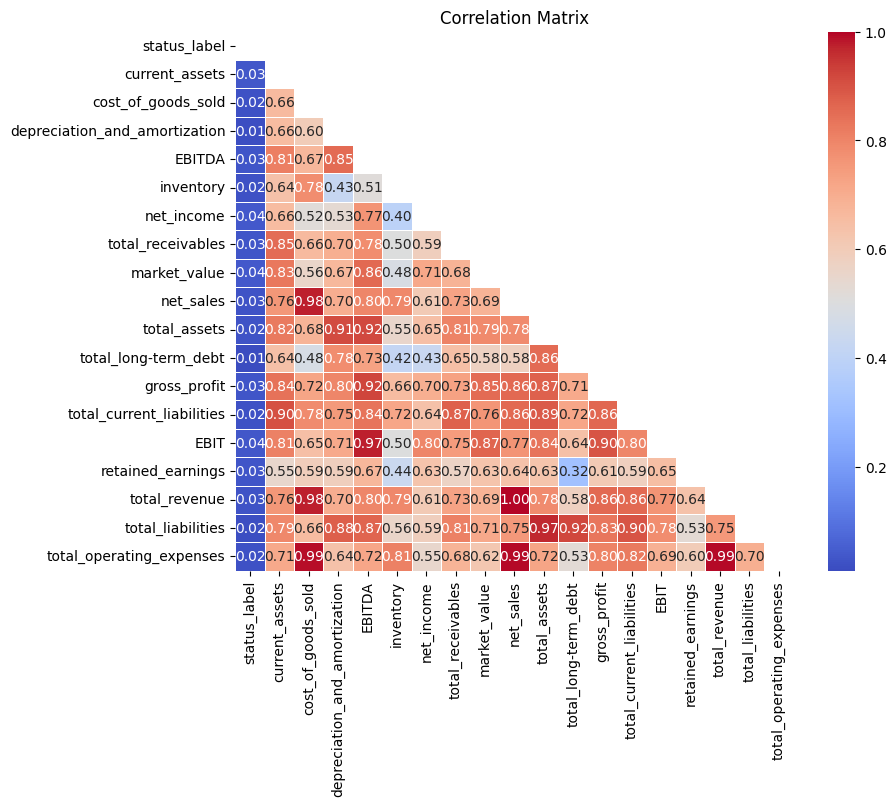

In [ ]:
variables = ['status_label', 'current_assets','cost_of_goods_sold','depreciation_and_amortization', 'EBITDA','inventory','net_income',
             'total_receivables', 'market_value', 'net_sales','total_assets','total_long-term_debt','gross_profit','total_current_liabilities', 'EBIT',
             'retained_earnings','total_revenue','total_liabilities','total_operating_expenses']
data = df[variables]
correlation_matrix = data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Matrix')
plt.show()


- **High Correlation Pairs**: Some pairs of variables show a high degree of correlation. For instance, `total_revenue` and `total_operating_expenses` have a correlation of `0.99`, indicating they move almost in perfect tandem. `cost_of_goods_sold` and `net_sales` have a correlation of `0.98`. `total_revenue` and `net_sales` have a correlation of `1.00`, `EBIT` and `EBITA` have a correlation of `0.97`.

- **Potential Multicollinearity**: Such high correlations may suggest multicollinearity, where two or more independent variables in a regression model are highly correlated. This condition can cause issues with the model interpretation, as it becomes difficult to isolate the effect of each variable.

- **Status Label Correlations**: The `status_label` seems to have low correlation coefficients with the financial variables, suggesting that none of the financial variables individually have a strong linear relationship with the status label.

- **Heatmap Color Scale**: The color scale on the right side helps in quickly identifying the strength of correlation. Darker red indicates a stronger positive correlation and darker blue indicates a weaker positive correlation, nearly to a zero correlation.

## Actions Based on Correlation Matrix

- We will drop highly correlated variables to reduce dimensionality and mitigate the effects of multicollinearity.
- Further analysis may involve looking into the causality of the correlations and building a model that can account for the interdependencies of these financial indicators.

This matrix is a crucial step in our exploratory data analysis, informing us of relationships that warrant further investigation and potential adjustments in our predictive modeling.


From the Correlation Matrix Analysis, we made the decision to the following columns:

In [ ]:
df=df.drop(columns=['cost_of_goods_sold','EBITDA','net_sales','total_revenue'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_name                   78682 non-null  object 
 1   status_label                   78682 non-null  int64  
 2   current_assets                 78682 non-null  float64
 3   depreciation_and_amortization  78682 non-null  float64
 4   inventory                      78682 non-null  float64
 5   net_income                     78682 non-null  float64
 6   total_receivables              78682 non-null  float64
 7   market_value                   78682 non-null  float64
 8   total_assets                   78682 non-null  float64
 9   total_long-term_debt           78682 non-null  float64
 10  EBIT                           78682 non-null  float64
 11  gross_profit                   78682 non-null  float64
 12  total_current_liabilities      78682 non-null 

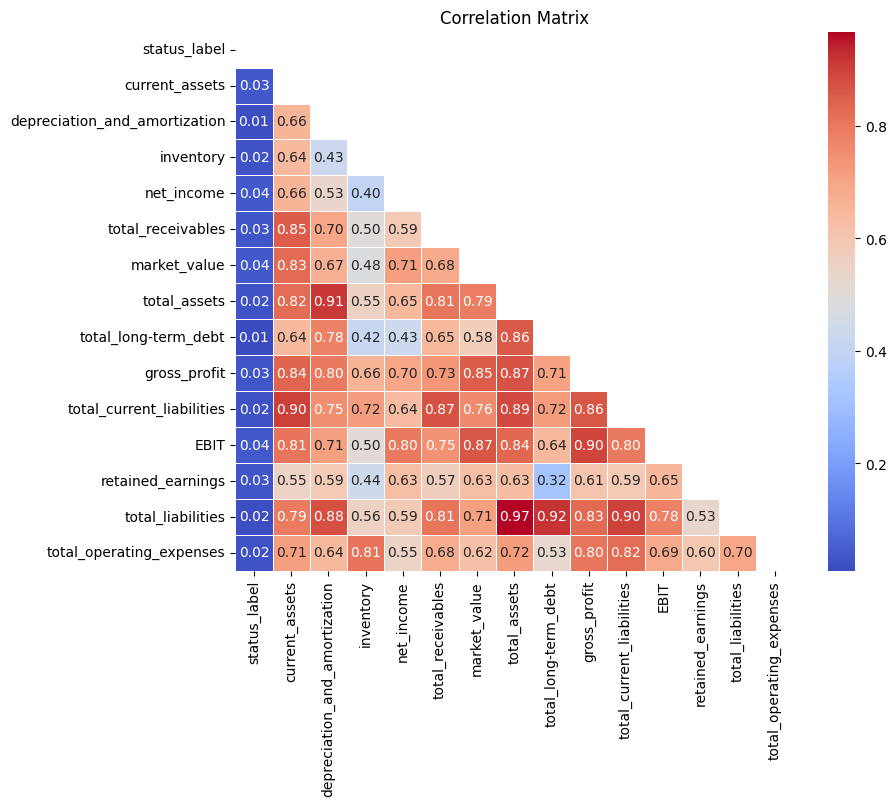

In [ ]:
variables = ['status_label', 'current_assets','depreciation_and_amortization','inventory','net_income',
             'total_receivables', 'market_value','total_assets','total_long-term_debt','gross_profit','total_current_liabilities', 'EBIT',
             'retained_earnings','total_liabilities','total_operating_expenses']
data = df[variables]
correlation_matrix = data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Matrix')
plt.show()

## Rationale for Retaining `total_assets` and `total_liabilities`:

- **Integral Financial Indicators**: Both `total_assets` and `total_liabilities` are fundamental metrics in financial analysis. They provide critical insights into a company's financial health and are commonly used in various financial ratios and assessments. They are currently not dropped because we have made the decision to group the columns to create new columns, only then we will drop them in the following step: Data Transformation

#**Data Transformation**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_name                   78682 non-null  object 
 1   status_label                   78682 non-null  int64  
 2   current_assets                 78682 non-null  float64
 3   depreciation_and_amortization  78682 non-null  float64
 4   inventory                      78682 non-null  float64
 5   net_income                     78682 non-null  float64
 6   total_receivables              78682 non-null  float64
 7   market_value                   78682 non-null  float64
 8   total_assets                   78682 non-null  float64
 9   total_long-term_debt           78682 non-null  float64
 10  EBIT                           78682 non-null  float64
 11  gross_profit                   78682 non-null  float64
 12  total_current_liabilities      78682 non-null 

In [ ]:
#Create a new column named 'current_liquidity' which represents the ratio of 'current_assets' to 'total_current_liabilities'
df['current_liquidity'] = df['current_assets'] / df['total_current_liabilities']
df.head()

,company_name,status_label,current_assets,depreciation_and_amortization,inventory,net_income,total_receivables,market_value,total_assets,total_long-term_debt,EBIT,gross_profit,total_current_liabilities,retained_earnings,total_liabilities,total_operating_expenses,current_liquidity
0,C_1,1,511.267,18.373,336.018,35.163,128.348,372.7519,740.998,180.447,70.658,191.226,163.816,201.026,401.483,935.302,3.120983
1,C_1,1,485.856,18.577,320.590,18.531,115.187,377.1180,701.854,179.987,45.790,160.444,125.392,204.065,361.642,809.888,3.874697
2,C_1,1,436.656,22.496,286.588,-58.939,77.528,364.5928,710.199,217.699,4.711,112.244,150.464,139.603,399.964,611.514,2.902063
3,C_1,1,396.412,27.172,259.954,-12.410,66.322,143.3295,686.621,164.658,3.573,109.590,203.575,124.106,391.633,575.592,1.947253
4,C_1,1,432.204,26.680,247.245,3.504,104.661,308.9071,709.292,248.666,20.811,128.656,131.261,131.884,407.608,604.467,3.292707


In [ ]:
#Create a new column named 'total_liquidity' which represents the ratio of 'total_assets' to 'total_liabilities'
df['total_liquidity']=df['total_assets']/df['total_liabilities']
df.head()

,company_name,status_label,current_assets,depreciation_and_amortization,inventory,net_income,total_receivables,market_value,total_assets,total_long-term_debt,EBIT,gross_profit,total_current_liabilities,retained_earnings,total_liabilities,total_operating_expenses,current_liquidity,total_liquidity
0,C_1,1,511.267,18.373,336.018,35.163,128.348,372.7519,740.998,180.447,70.658,191.226,163.816,201.026,401.483,935.302,3.120983,1.845652
1,C_1,1,485.856,18.577,320.590,18.531,115.187,377.1180,701.854,179.987,45.790,160.444,125.392,204.065,361.642,809.888,3.874697,1.940743
2,C_1,1,436.656,22.496,286.588,-58.939,77.528,364.5928,710.199,217.699,4.711,112.244,150.464,139.603,399.964,611.514,2.902063,1.775657
3,C_1,1,396.412,27.172,259.954,-12.410,66.322,143.3295,686.621,164.658,3.573,109.590,203.575,124.106,391.633,575.592,1.947253,1.753226
4,C_1,1,432.204,26.680,247.245,3.504,104.661,308.9071,709.292,248.666,20.811,128.656,131.261,131.884,407.608,604.467,3.292707,1.740133


In [ ]:
#Drop the 'current_asstes', 'total_assets', 'total_current_liabilities' and 'total_liabilities' columns
df=df.drop(columns=['current_assets','total_assets','total_current_liabilities','total_liabilities'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_name                   78682 non-null  object 
 1   status_label                   78682 non-null  int64  
 2   depreciation_and_amortization  78682 non-null  float64
 3   inventory                      78682 non-null  float64
 4   net_income                     78682 non-null  float64
 5   total_receivables              78682 non-null  float64
 6   market_value                   78682 non-null  float64
 7   total_long-term_debt           78682 non-null  float64
 8   EBIT                           78682 non-null  float64
 9   gross_profit                   78682 non-null  float64
 10  retained_earnings              78682 non-null  float64
 11  total_operating_expenses       78682 non-null  float64
 12  current_liquidity              78682 non-null 

Columns `current_assets` and `total_current_liabilities` computed to form a new column named `current_liquidity` while columns `total_assets` and `total_liabilities` are computed to form a new column named `total_liquidity`. Both `current_liquidity` and `total_liquidity` columns are actually ratio that encapsulates the relationship between current assets & current liabilities and total_assets & total_liabilities in two single metrics, making the dataset more concise and for an easier analysis. Therefore, we have dropped:
  - `current_assets`
  - `total_current_liabilities`
  - `total_assets`
  - `total_liabilities`

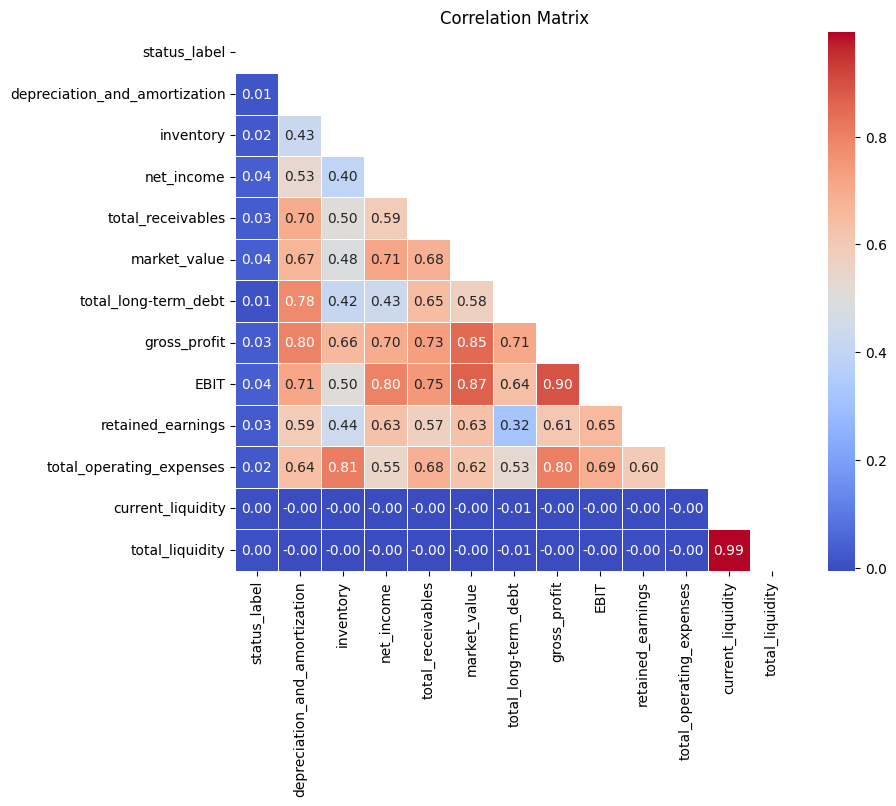

In [ ]:
variables = ['status_label','depreciation_and_amortization','inventory','net_income',
             'total_receivables', 'market_value','total_long-term_debt','gross_profit', 'EBIT',
             'retained_earnings','total_operating_expenses','current_liquidity','total_liquidity']
data = df[variables]
correlation_matrix = data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Matrix')
plt.show()

As seen in the correlation matrix, `current_liquidity` has high correlation with `total_liquidity`, while `total_liquidity` is the new column we just formed from combining columns, we have made the decision to drop `current_liquidity`.

In [ ]:
df=df.drop(columns=['current_liquidity'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_name                   78682 non-null  object 
 1   status_label                   78682 non-null  int64  
 2   depreciation_and_amortization  78682 non-null  float64
 3   inventory                      78682 non-null  float64
 4   net_income                     78682 non-null  float64
 5   total_receivables              78682 non-null  float64
 6   market_value                   78682 non-null  float64
 7   total_long-term_debt           78682 non-null  float64
 8   EBIT                           78682 non-null  float64
 9   gross_profit                   78682 non-null  float64
 10  retained_earnings              78682 non-null  float64
 11  total_operating_expenses       78682 non-null  float64
 12  total_liquidity                78682 non-null 

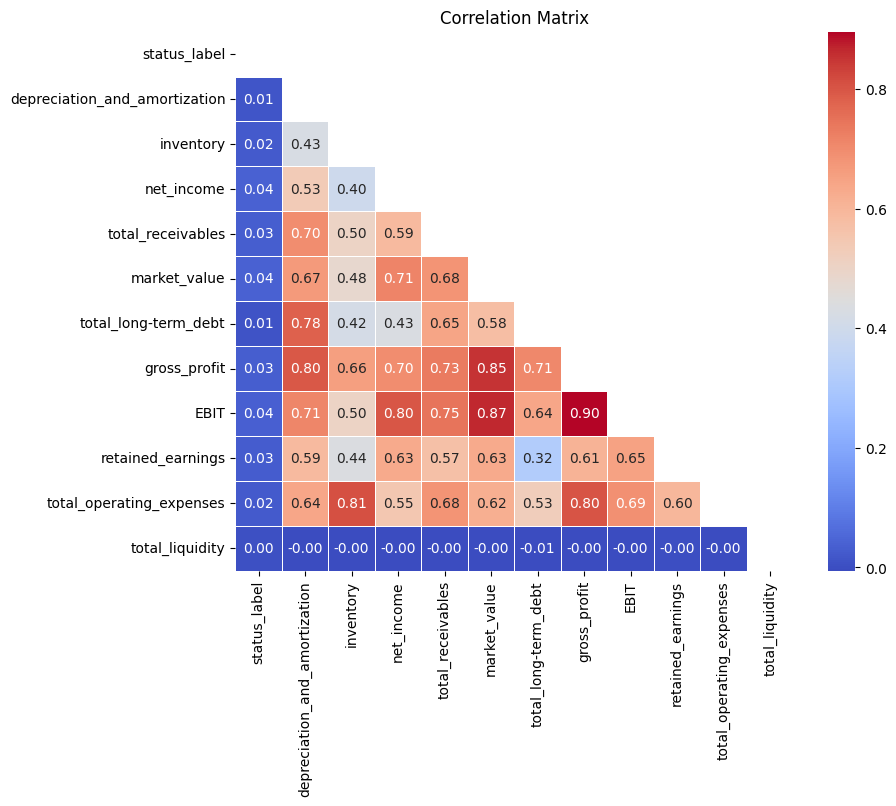

In [ ]:
variables = ['status_label','depreciation_and_amortization','inventory','net_income',
             'total_receivables', 'market_value','total_long-term_debt','gross_profit', 'EBIT',
             'retained_earnings','total_operating_expenses','total_liquidity']
data = df[variables]
correlation_matrix = data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Matrix')
plt.show()

## Finalizing Feature Selection

After a thorough review of the correlation matrix for our dataset's financial metrics, we have decided to retain the remaining variables without further removals. This decision is illustrated in the heatmap and is underpinned by the following justifications:

**Insights from the Correlation Matrix**:

The heatmap indicates varying degrees of linear relationships between the financial metrics:

- While some variables do show moderate to high correlations with each other, none exhibit a perfect or near-perfect correlation (close to `1.0` or `-1.0`) that would typically necessitate removal to avoid multicollinearity.
- Variables such as `EBIT` (Earnings Before Interest and Taxes) and `gross_profit` show a high correlation (`0.90`), which is expected due to their related nature in financial analysis. However, each of these variables may still offer unique insights due to their different accounting considerations.

**Rationale Behind Retaining Variables**:

- **Comprehensive Analysis**: Each financial metric, despite correlations, represents distinct aspects of a company's financial performance and health. Maintaining a broad set of features may allow for a more nuanced analysis.
- **Diminishing Returns**: Further reduction of features based on the current correlation levels may lead to a loss of valuable information with minimal gains in reducing multicollinearity.
- **Model Complexity Balance**: We aim to balance model complexity and performance. Over-pruning features can oversimplify the model, potentially omitting critical information.

We believe that the current set of features strikes an appropriate balance between capturing complex financial relationships and maintaining a model that is not overly simplified. The existing correlations do not strongly indicate redundancy to a degree that would impair the model's performance.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_name                   78682 non-null  object 
 1   status_label                   78682 non-null  int64  
 2   depreciation_and_amortization  78682 non-null  float64
 3   inventory                      78682 non-null  float64
 4   net_income                     78682 non-null  float64
 5   total_receivables              78682 non-null  float64
 6   market_value                   78682 non-null  float64
 7   total_long-term_debt           78682 non-null  float64
 8   EBIT                           78682 non-null  float64
 9   gross_profit                   78682 non-null  float64
 10  retained_earnings              78682 non-null  float64
 11  total_operating_expenses       78682 non-null  float64
 12  total_liquidity                78682 non-null 

##Features Summarization:

**After data cleaning and transformation**:

* From df.info(), the dataset has 13 columns. It consists of 12 features determining 1 target output. The target output is status_label which can determine whether the company is bankrupt or not.
Hence, the number of 12 features is enough, considering at least 4 or 5 features and above is needed.

* From df.info(), it has 78682 samples, considering the minimum number of samples is best set at 100 samples.
Hence, the dataset has enough samples.

* The dataset consists of object, int, float as the datatypes. Most of the colums consist of 'float' datatypes.

#**Z-score normalization**

array([[<Axes: title={'center': 'status_label'}>,
        <Axes: title={'center': 'depreciation_and_amortization'}>,
        <Axes: title={'center': 'inventory'}>],
       [<Axes: title={'center': 'net_income'}>,
        <Axes: title={'center': 'total_receivables'}>,
        <Axes: title={'center': 'market_value'}>],
       [<Axes: title={'center': 'total_long-term_debt'}>,
        <Axes: title={'center': 'EBIT'}>,
        <Axes: title={'center': 'gross_profit'}>],
       [<Axes: title={'center': 'retained_earnings'}>,
        <Axes: title={'center': 'total_operating_expenses'}>,
        <Axes: title={'center': 'total_liquidity'}>]], dtype=object)

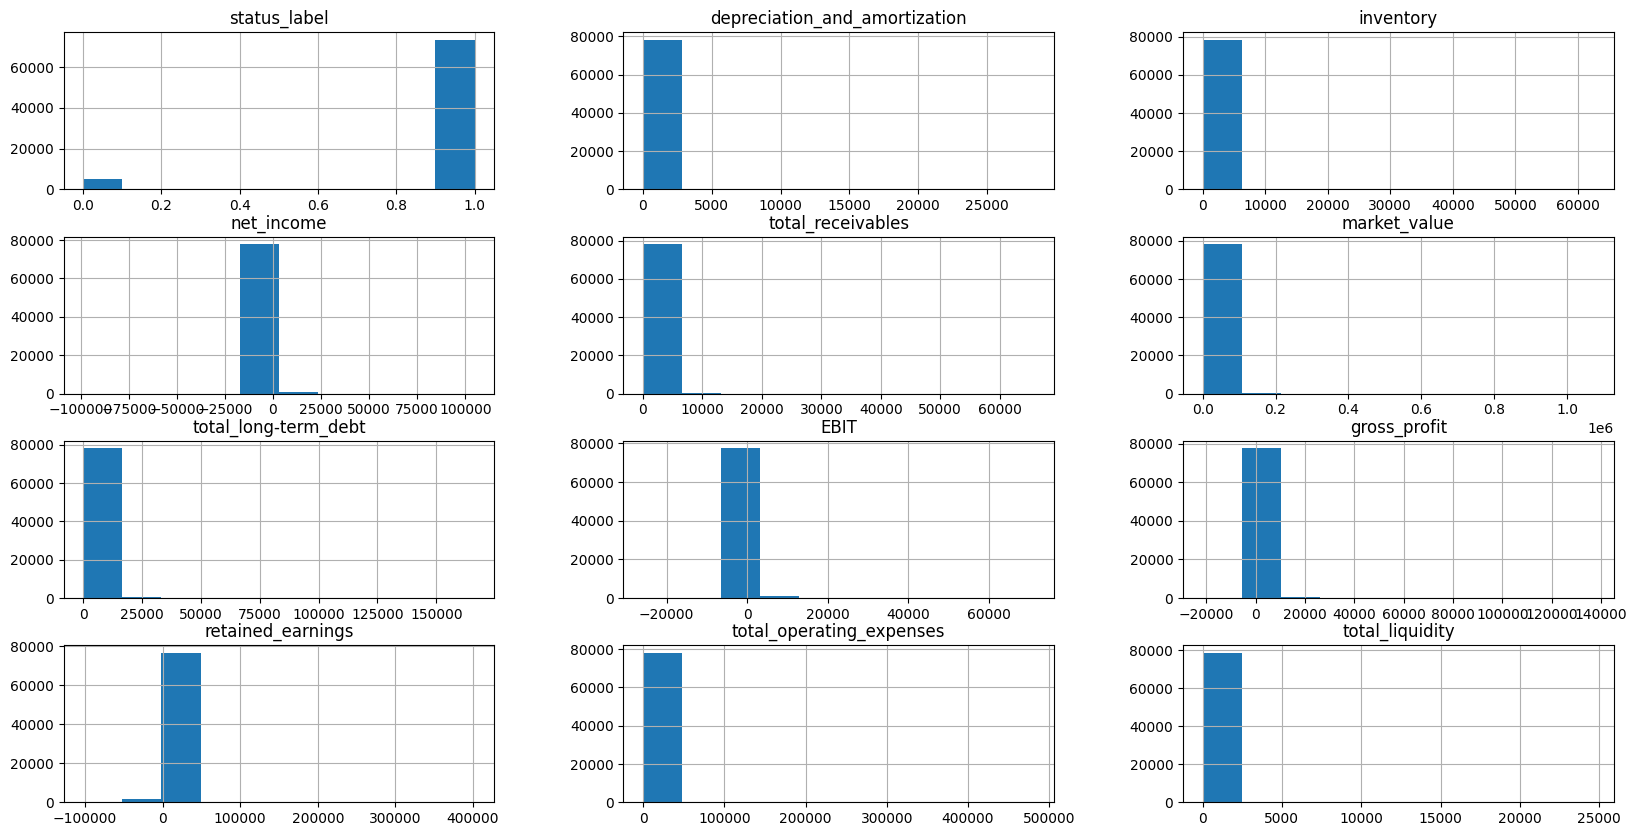

In [ ]:
df_master=df.copy()
#Make a copy of the original DataFrame

df_master.hist(figsize=(20,10))
#create histograms for each numerical column in the DataFrame df_master.

In [ ]:
from sklearn import preprocessing
m=preprocessing.MinMaxScaler(feature_range=(0,1))

#Apply normalization techniques
df_master_norm_min_max = df_master.copy()

df_master_norm_min_max[['depreciation_and_amortization','inventory','net_income','total_receivables','market_value','total_long-term_debt',
                        'EBIT','gross_profit','retained_earnings','total_operating_expenses','total_liquidity']]=m.fit_transform(df_master_norm_min_max[['depreciation_and_amortization','inventory',
                                                                                                                                                         'net_income','total_receivables',
                                                                                                                                                         'market_value','total_long-term_debt',
                                                                                                                                                         'EBIT','gross_profit','retained_earnings',
                                                                                                                                                         'total_operating_expenses','total_liquidity']])

#After min-max normalization
df_master_norm_min_max.head()

,company_name,status_label,depreciation_and_amortization,inventory,net_income,total_receivables,market_value,total_long-term_debt,EBIT,gross_profit,retained_earnings,total_operating_expenses,total_liquidity
0,C_1,1,0.000646,0.005371,0.485125,0.001950,0.000347,0.001086,0.267478,0.136958,0.203316,0.002599,0.000075
1,C_1,1,0.000653,0.005124,0.485043,0.001750,0.000351,0.001083,0.267222,0.136764,0.203322,0.002339,0.000079
2,C_1,1,0.000791,0.004580,0.484663,0.001178,0.000340,0.001310,0.266800,0.136460,0.203194,0.001927,0.000072
3,C_1,1,0.000956,0.004155,0.484891,0.001008,0.000134,0.000991,0.266788,0.136443,0.203164,0.001853,0.000071
4,C_1,1,0.000938,0.003952,0.484969,0.001590,0.000288,0.001496,0.266965,0.136563,0.203179,0.001913,0.000071


array([[<Axes: title={'center': 'status_label'}>,
        <Axes: title={'center': 'depreciation_and_amortization'}>,
        <Axes: title={'center': 'inventory'}>],
       [<Axes: title={'center': 'net_income'}>,
        <Axes: title={'center': 'total_receivables'}>,
        <Axes: title={'center': 'market_value'}>],
       [<Axes: title={'center': 'total_long-term_debt'}>,
        <Axes: title={'center': 'EBIT'}>,
        <Axes: title={'center': 'gross_profit'}>],
       [<Axes: title={'center': 'retained_earnings'}>,
        <Axes: title={'center': 'total_operating_expenses'}>,
        <Axes: title={'center': 'total_liquidity'}>]], dtype=object)

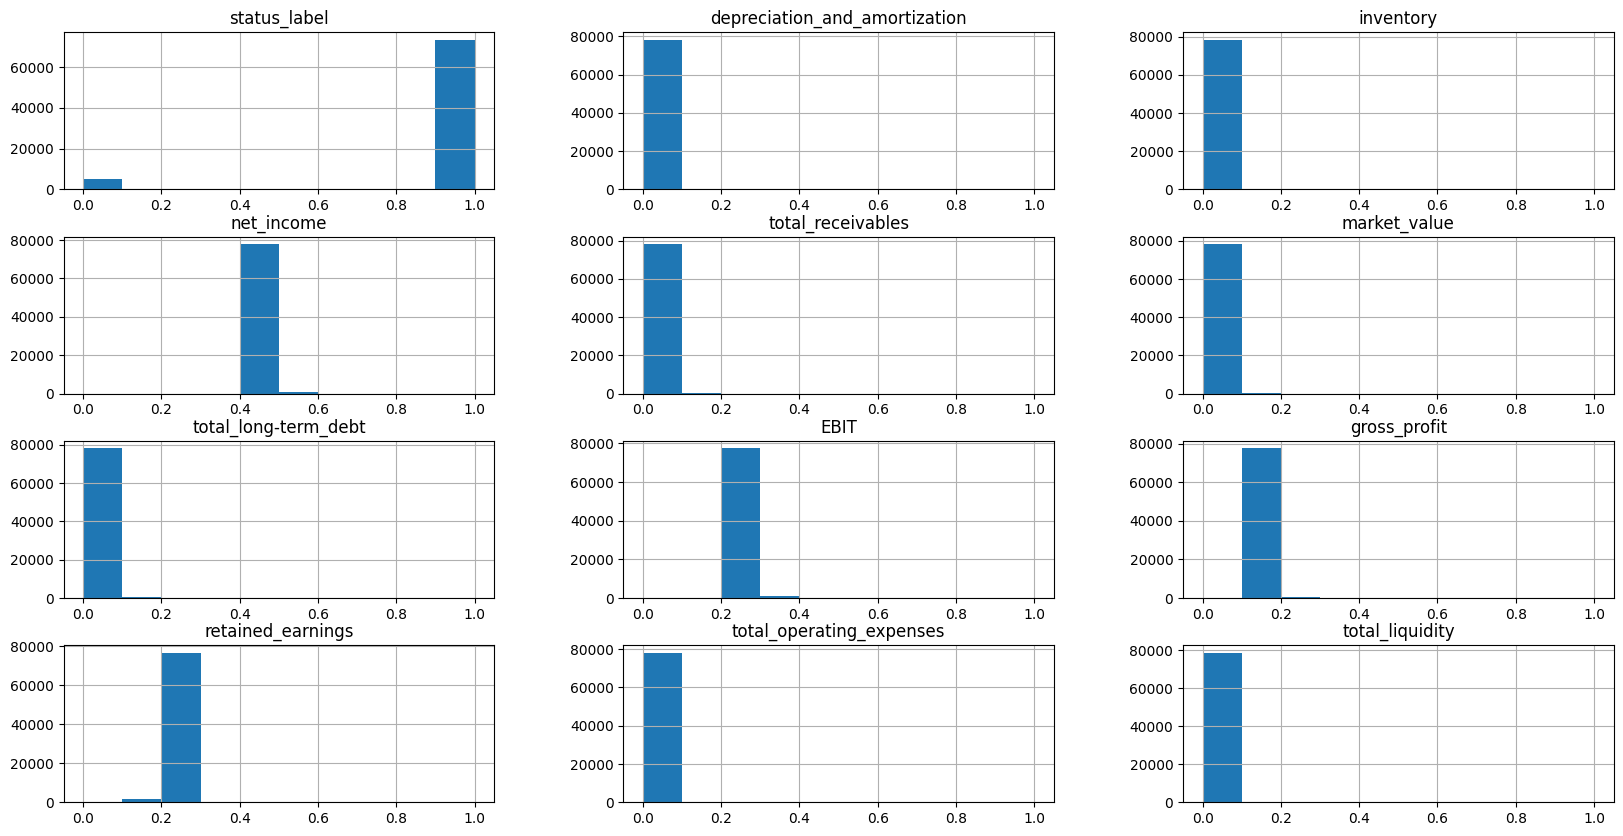

In [ ]:
df_master_norm_min_max.hist(figsize=(20,10))

array([[<Axes: title={'center': 'status_label'}>,
        <Axes: title={'center': 'depreciation_and_amortization'}>,
        <Axes: title={'center': 'inventory'}>],
       [<Axes: title={'center': 'net_income'}>,
        <Axes: title={'center': 'total_receivables'}>,
        <Axes: title={'center': 'market_value'}>],
       [<Axes: title={'center': 'total_long-term_debt'}>,
        <Axes: title={'center': 'EBIT'}>,
        <Axes: title={'center': 'gross_profit'}>],
       [<Axes: title={'center': 'retained_earnings'}>,
        <Axes: title={'center': 'total_operating_expenses'}>,
        <Axes: title={'center': 'total_liquidity'}>]], dtype=object)

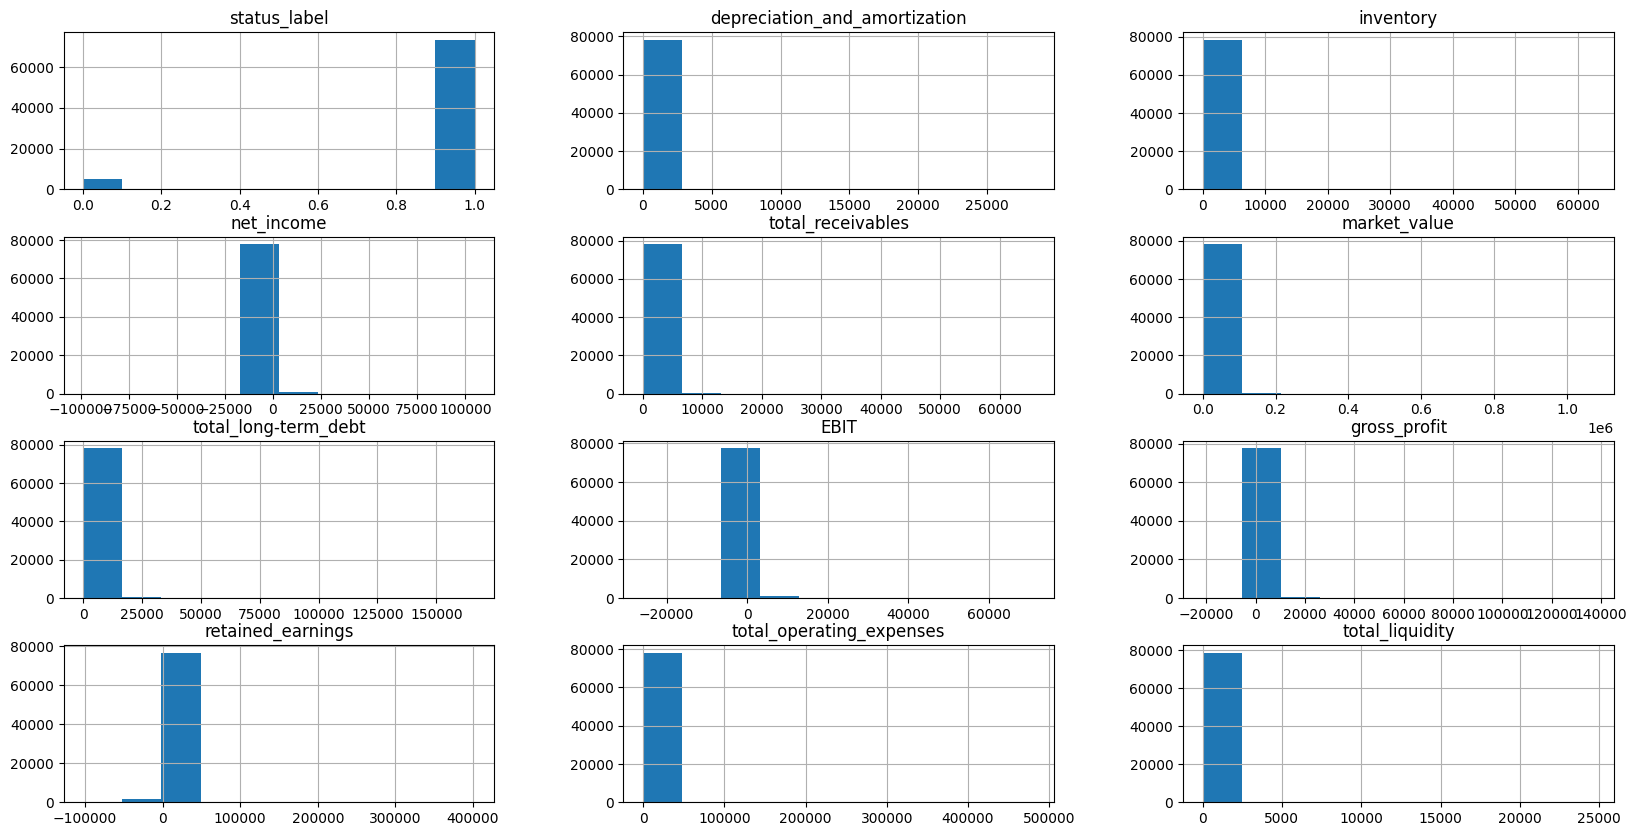

In [ ]:
import sklearn.preprocessing as preprocessing
m=preprocessing.StandardScaler()

# Apply normalization techniques
df_master_norm_std_scaler = df_master.copy()

df_master_norm_min_max[['depreciation_and_amortization','inventory','net_income','total_receivables','market_value','total_long-term_debt',
                        'EBIT','gross_profit','retained_earnings','total_operating_expenses','total_liquidity']]=m.fit_transform(df_master_norm_min_max[['depreciation_and_amortization','inventory',
                                                                                                                                                         'net_income','total_receivables',
                                                                                                                                                         'market_value','total_long-term_debt',
                                                                                                                                                         'EBIT','gross_profit','retained_earnings',
                                                                                                                                                         'total_operating_expenses','total_liquidity']])

#After z-score normalization
df_master_norm_std_scaler.hist(figsize=(20,10))

#**Data Aggregation**

This step creates a grouped summary of the DataFrame by company, calculating the mean of all numerical columns for each company, which helps in understanding company-specific trends and characteristics.

In [ ]:
#Make a copy of the original DataFrame
df_agg=df.copy()

#group the DataFrame df_agg by the unique values in the 'company_name' column and then calculate the mean for each numeric column within each group
df_by_company = df_agg.groupby('company_name').aggregate({'mean'})

df_by_company.head(5)

,status_label,depreciation_and_amortization,inventory,net_income,total_receivables,market_value,total_long-term_debt,EBIT,gross_profit,retained_earnings,total_operating_expenses,total_liquidity
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
company_name,,,,,,,,,,,,
C_1,1.0,50.438474,441.274684,36.2630,198.328211,748.541426,303.541421,76.711579,268.311053,379.262105,1214.330526,1.957553
C_10,1.0,426.108500,203.018750,314.5617,423.073100,5253.193310,3128.634750,691.744500,1117.853000,1461.767850,2212.197650,1.446259
C_100,1.0,11.712067,1.691133,22.6022,9.583267,624.822920,0.966667,17.301400,38.080267,150.406267,34.404933,10.819256
C_1000,1.0,154.053800,213.319000,882.4987,1076.931250,18809.292005,1215.807250,1519.162750,3433.467300,5520.977450,3787.173050,1.512991
C_1001,1.0,362.680000,9939.015000,1049.5100,9681.020000,20111.374065,3668.255000,1883.430000,6536.760000,6654.100000,113751.590000,1.333097


#**Data Visualization**

## Box plot to show the outlier of the columns

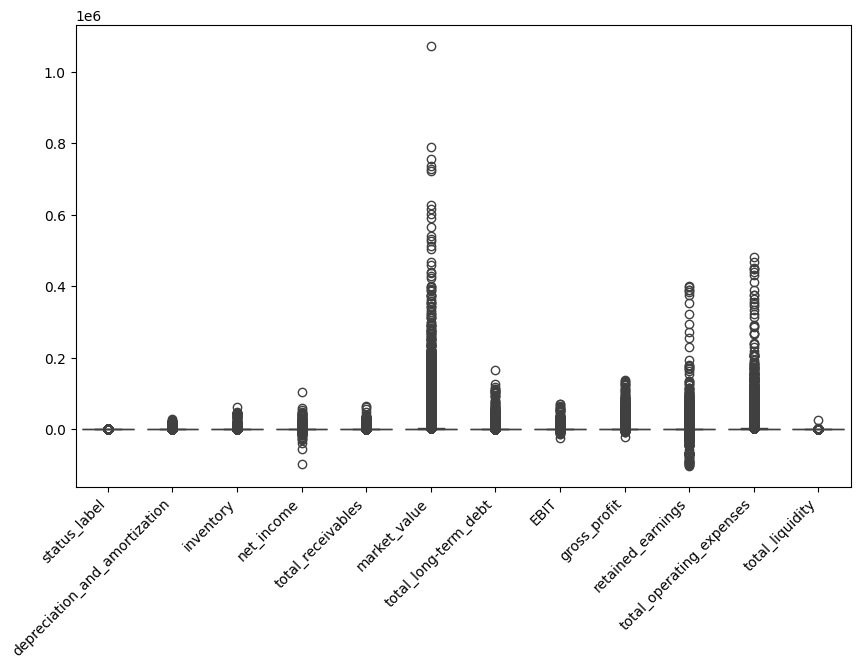

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set the figure size
plt.figure(figsize=(10, 6))

# Create resizable boxplots using seaborn
sns.boxplot(data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

The central line in each box represents the median of the data.
The edges of the box are the first and third quartiles, so the box spans the interquartile range (IQR).
The "whiskers" extend from the box to show the range of the data, typically 1.5 times the IQR from the Q1 and Q3.
Any points beyond the whiskers are plotted individually and are often considered outliers, which are points that fall outside of the expected range.
The y-axis is on a logarithmic scale, as indicated by the '1e6' at the top, which means the values are scaled to powers of 10 for easier visualization of wide-ranging data.

Since we have enough sample, we have decided to drop sample with outlier for column `market_value` considering that the sample with outlier does not convey any hidden message and pattern to be discovered.

Such plots are useful for comparing distributions between several variables or categories. They can highlight differences in central tendency and variability, and can also reveal skewness in the distribution of the data.


## Pie chart to show the percentage distribution of status label

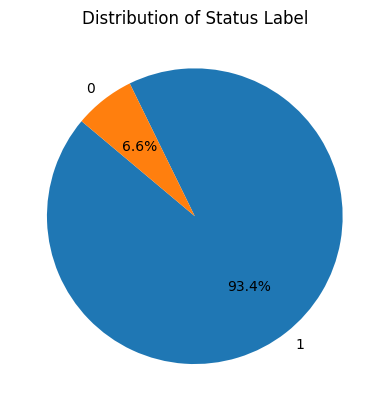

In [ ]:
status_label_counts = df['status_label'].value_counts()
labels = status_label_counts.index
sizes = status_label_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140) #using the pie function from the Matplotlib library to create a pie chart
#The chart will display the percentage distribution of each status label

plt.title('Distribution of Status Label')
plt.show()

The resulting pie chart provides a visual representation of the distribution of two categories within the ```status_label``` variable, designated as 0 and 1. It shows that the majority of the data falls into category 1 (company will NOT be bankrupt) , which makes up 93.4% of the dataset, while category 0 (company will be bankrupt) is a smaller portion, representing 6.6% of the data. The chart's slices are colored differently to distinguish between the two categories, and the percentages are displayed within the corresponding slices.

## Histogram to show the total liquidity distribution by status

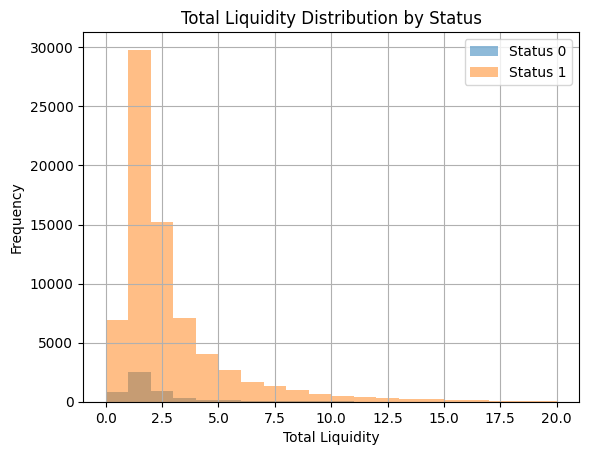

In [ ]:
fig, ax = plt.subplots()
# Plot a histogram for each status_label category with total_liquidity values ranging from 0 to 20
df[df['status_label'] == 0]['total_liquidity'].hist(ax=ax, label='Status 0', alpha=0.5, bins=20, range=(0,20))
df[df['status_label'] == 1]['total_liquidity'].hist(ax=ax, label='Status 1', alpha=0.5, bins=20, range=(0,20))

# Setting labels and title
ax.set_title('Total Liquidity Distribution by Status')
ax.set_xlabel('Total Liquidity')
ax.set_ylabel('Frequency')
ax.legend()

# Show plot
plt.show()

The resulting plot shows the histograms for Status 0 and Status 1, indicating how total liquidity is distributed across these two categories. The x-axis represents total liquidity, and the y-axis represents the frequency of occurrences within the specified liquidity range. The plot reveals the count of occurrences for different ranges of total liquidity for each status.

## Histogram to show the net income distribution by status

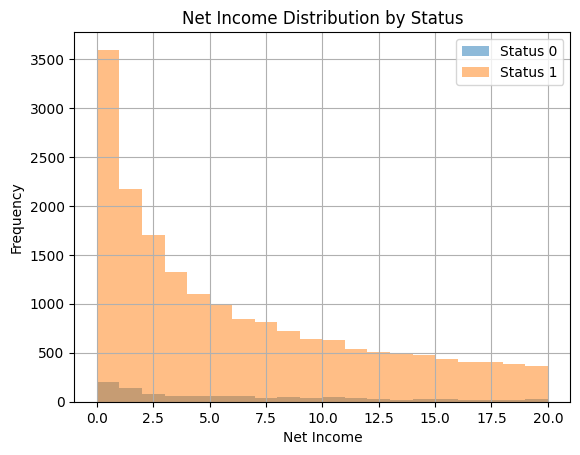

In [ ]:
fig, ax = plt.subplots()
# Plot a histogram for each status_label category with net_income values ranging from 0 to 20
df[df['status_label'] == 0]['net_income'].hist(ax=ax, label='Status 0', alpha=0.5, bins=20, range=(0,20))
df[df['status_label'] == 1]['net_income'].hist(ax=ax, label='Status 1', alpha=0.5, bins=20, range=(0,20))

# Setting labels and title
ax.set_title('Net Income Distribution by Status')
ax.set_xlabel('Net Income')
ax.set_ylabel('Frequency')
ax.legend()

# Show plot
plt.show()

The resulting histogram plot visualizes the frequency distribution of ```net_income``` for two different statuses. We can observe that both statuses show a similar pattern, with most data points concentrated towards the lower end of the net income scale. This kind of plot is useful for comparing the distributions of a numerical variable across different categories.

#**Splitting of dataset**

In [ ]:
X = df.drop(columns=[ 'status_label','company_name'])
y = df['status_label']

##**1st splitting result**

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Set Size: {}".format(len(X_train)))
print("Test Set Size: {}".format(len(X_test)))

Training Set Size: 62945
Test Set Size: 15737


```train_test_split```: This function is used for splitting the data arrays into two subsets: for training data and for testing data.

X and y: These are the feature matrix and the target variable vector respectively.

X = independent variables, y = dependent variable (the one we want to predict).

```test_size=0.2```: This parameter specifies the proportion of the dataset to include in the test split. Here, it is set to 0.2, meaning that 20% of the data will be used for testing, and the remaining 80% will be used for training the model.

```random_state=42```: This parameter is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices in your dataset. Using the same random state ensures that the split is reproducible; that is, the split will be the same every time the code is run.

The result of this code is four sets of data: X_train and y_train for training the model, and X_test and y_test for validating the model's performance.

##**2nd splitting result**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and temporary sets (70% training, 30% temporary)
X_train_1, X_temp, y_train_1, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temporary set into validation and test sets (50% validation, 50% test)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the sizes of the sets
print("Training Set Size: {}".format(len(X_train_1)))
print("Test Set Size: {}".format(len(X_test_1)))
print("Validation Set Size: {}".format(len(X_val_1)))

Training Set Size: 55077
Test Set Size: 11803
Validation Set Size: 11802


`test_size=0.3`: In the first split, this argument indicates that 30% of the data should be reserved for the combined validation and test sets, leaving 70% for training the model.

`test_size=0.5`: In the second split, this argument specifies that the temporary set should be evenly divided, resulting in 15% of the original data for validation and 15% for testing.

`random_state=42`: This argument ensures that the split is consistent across multiple runs. The random number generator initialized with this state will always split the data in the same way, allowing for reproducibility.

Outcome:
We end up with four datasets.

`X_train` and `y_train` for training the model (70% of the data).

`X_val` and `y_val` for tuning model parameters and performing cross-validation (15% of the data).

`X_test` and `y_test` for the final evaluation of the model's performance (15% of the data).

This splitting strategy helps to mitigate overfitting and allows for a comprehensive assessment of the model's predictive power on unseen data.

#**Training Model using: SVM**

We chose SVM to train our model because of the following reasons:

- SVM has an inherent capacity to avoid overfitting, especially in high-dimensional space.

- Can be used in both Classification and Regression, similar to Random Forest, SVM can be used for classification (SVC) and regression (SVR) tasks.

- It is a supervised Learning Algorithm like Random Forest, SVM is a supervised learning algorithm, meaning it learns from a labeled training dataset to make predictions or decisions without human intervention.

This comparison highlights the suitability of SVM in different scenarios, particularly where high-dimensional data or clear margins of separation are involved.

## **Model for 1st splitting dataset**

In [ ]:
from sklearn.svm import SVC

svm = SVC(probability=True,random_state=42)
svm.fit(X_train, y_train)


SVC(probability=True, random_state=42)

###ROC Curve

The provided ROC curve is a graphical representation of a classifier's diagnostic ability.

- **X-Axis (False Positive Rate):** This axis represents the proportion of negative instances that are falsely classified as positive by the model.

- **Y-Axis (True Positive Rate):** This axis represents the proportion of actual positives that are correctly identified by the classifier.

- **Diagonal Dashed Line:** The line y = x represents a random guess. It serves as a baseline for comparison.

- **ROC Curve (Orange Line):** Illustrates the trade-off between the true positive rate and the false positive rate at various threshold settings. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

- **Area Under the Curve (AUC):** A scalar value that quantifies the overall ability of the model to discriminate between positive and negative classes. An AUC of 0.5 suggests no discrimination (equivalent to random chance), while an AUC of 1.0 indicates perfect discrimination.

In [ ]:
def predictor(svm):
    print("For the {}".format(svm))
    y_pred_train_4 = svm.predict(X_train)
    y_pred_test_4 = svm.predict(X_test)
    print("The TRAIN accuracy is",accuracy_score(y_train,y_pred_train_4))
    fpr,tpr,thresholds = roc_curve(y_train,svm.predict_proba(X_train)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    print("--"*50)
    print("The TEST accuracy is",accuracy_score(y_test,y_pred_test_4))
    fpr,tpr,thresholds = roc_curve(y_test,svm.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


For the SVC(probability=True, random_state=42)
The TRAIN accuracy is 0.9340376519183414


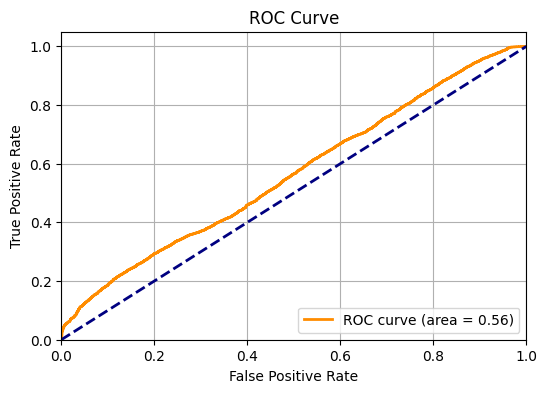

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.9321344601893626


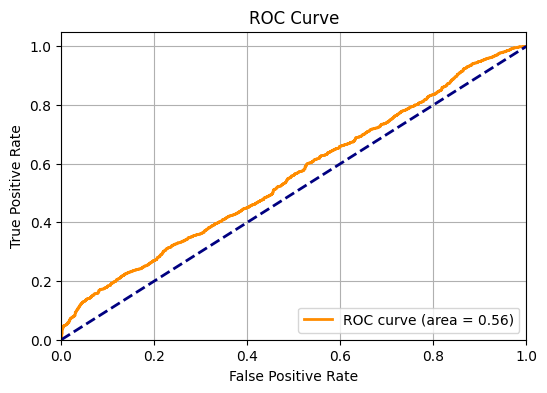

In [ ]:
predictor(svm)

**ROC Curve for Training Data**: The ROC curve for the training data is a line that hugs the left-hand and top borders of the ROC space, which indicates that the area under the curve (AUC) is very close to 1. This demonstrates a nearly perfect classification by the model on the training data, as it suggests an ideal scenario where the model correctly classifies all positive and negative cases with high confidence. The training accuracy is reported to be approximately `0.934`, reinforcing the indication from the ROC curve that the model has learned the training data exceptionally well.

**ROC Curve for Test Data**: The ROC curve for the test data, while still above the diagonal line of no-discrimination, shows an AUC of `0.56`. This is a modest score and indicates that the model's performance on the test data is less convincing compared to its performance on the training set. The test accuracy is approximately `0.932`, which is relatively high, but considering the AUC value, it raises concerns that the model might not be as effective at distinguishing between the classes on unseen data. This could be a sign of the model not generalizing as well as desired.

The perfect classification performance on the training set contrasted with the modest AUC on the test set suggests that the model might be overfitting. Overfitting occurs when a model learns the details and noise in the training data to an extent that it negatively impacts the performance of the model on new data.

The discrepancy between the training and test performance could imply that the model is not generalizing well to unseen data. While the model appears to have learned to separate the training data almost perfectly, its ability to do the same on test data is not as effective.



###Classification Report

In [ ]:
y_pred_train_4 = svm.predict(X_train)
y_pred_test_4 = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_test_4))
print("Classification Report:\n", classification_report(y_test, y_pred_test_4))

Accuracy: 0.9321344601893626
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1068
           1       0.93      1.00      0.96     14669

    accuracy                           0.93     15737
   macro avg       0.47      0.50      0.48     15737
weighted avg       0.87      0.93      0.90     15737



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


`Accuracy`: The model's accuracy score is `0.9321`, indicating that approximately `93.21%` of the predictions match the true labels.

`Precision`: The precision for class 0 (company will be bankrupt) is 0.00, indicating the model predicted all companies as non-bankrupt. For class 1 (company will NOT be bankrupt), the precision is `0.93`, meaning that when the model predicts a company will not be bankrupt, it is correct `93%` of the time.

`Recall`: The recall for class 0 (company will be bankrupt) is `0.00`, indicating the model did not correctly identify any actual bankrupt companies. The recall for class 1 (company will NOT be bankrupt) is `1.00`, meaning the model identified all non-bankrupt companies correctly.

`F1-Score`: The F1-score for class 0 (company will be bankrupt) is `0.00`, which is expected given the precision and recall are both 0. The F1-score for class 1 (company will NOT be bankrupt) is `0.96`, which is high and indicates a good balance between precision and recall for predicting the non-bankrupt companies.

`Support`: The support is the number of actual occurrences of each class in the dataset, with `1068` instances of class 0 and `14669` instances of class 1.

The report also includes averages of the metrics:

`Macro Average`: This averages the unweighted mean per label, which is `0.47` for precision, `0.50` for recall, and `0.48` for f1-score.

`Weighted Average`: This averages the support-weighted mean per label, which is `0.87` for precision, `0.93` for recall, and `0.90` for f1-score, reflecting the imbalance in support between the classes.

The classification report suggests that while the model is accurate overall, it performs much better at identifying non-bankrupt companies than bankrupt ones, indicating a potential issue with class imbalance or the model's ability to generalize to the minority class.


The error messages listed are `UndefinedMetricWarning` messages from scikit-learn. These warnings are raised when a metric is undefined for a particular condition or calculation during the model's evaluation process.

Precision is defined as the number of true positives divided by the number of true positives plus the number of false positives. If there are no true positives, this results in a division by zero situation.

If the other class has zero instances predicted correctly (class 0 with a recall of 0.00), scikit-learn will issue a warning when calculating the average metrics across classes.

###Confusion Matrix

Confusion Matrix:
[[    0  4152]
 [    0 58793]]


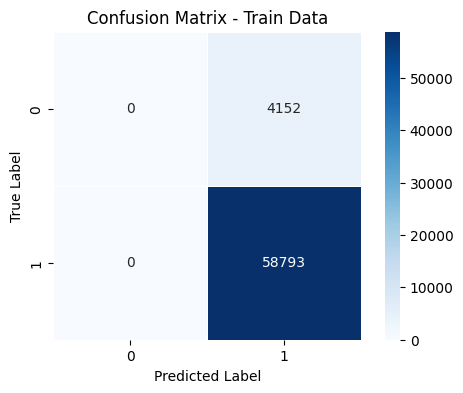

In [ ]:
cm_train_4 = confusion_matrix(y_train, y_pred_train_4)
print("Confusion Matrix:")
print(cm_train_4)

# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(6, 4))
plt.title("Confusion Matrix - Train Data")
sns.heatmap(cm_train_4, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- Top Left Cell (True Negatives - TN): 0 instances were correctly predicted as the negative class (class 0).
- Top Right Cell (False Positives - FP): 4152 instances were incorrectly predicted as the positive class (class 1) when they were actually the negative class (class 0).
- Bottom Left Cell (False Negatives - FN): 0 instances were incorrectly predicted as the negative class (class 0) when they were actually the positive class (class 1).
- Bottom Right Cell (True Positives - TP): 58793 instances were correctly predicted as the positive class (class 1).

The heatmap of the confusion matrix suggests that the model perfectly identified all positive class instances (class 1) but failed to correctly identify any negative class instances (class 0), predicting them as class 1 instead. This indicates a significant issue with the model's ability to distinguish between the two classes, potentially due to class imbalance or other factors in the training data.


Confusion Matrix:
[[    0  1068]
 [    0 14669]]


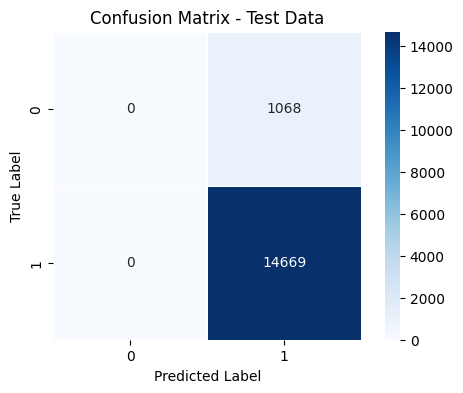

In [ ]:
cm_test_4 = confusion_matrix(y_test, y_pred_test_4)
print("Confusion Matrix:")
print(cm_test_4)

# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(6, 4))
plt.title("Confusion Matrix - Test Data")
sns.heatmap(cm_test_4, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- Top Left Cell (True Negatives - TN): 0 instances were correctly predicted as the negative class (class 0), which suggests the model did not identify any of the negative cases correctly.
- Top Right Cell (False Positives - FP): 1068 instances were incorrectly classified as the positive class (class 1) when they were actually the negative class (class 0).
- Bottom Left Cell (False Negatives - FN): 0 instances were incorrectly classified as the negative class (class 0) when they were actually the positive class (class 1).
- Bottom Right Cell (True Positives - TP): 14669 instances were correctly identified as the positive class (class 1).

This heatmap indicates that the model has a bias towards predicting the positive class. It correctly identifies all instances that are not bankrupt (class 1), but it fails to recognize any instances of bankruptcy (class 0), which is a critical flaw for a bankruptcy prediction model.


###Precision-Recall Curve

It is a plot that shows the tradeoff between precision and recall for a classifier at different thresholds. Here's an explanation of its components:

- **X-Axis (Recall):** Represent the True Positive Rate, measures the proportion of actual positives that are correctly identified (i.e., the number of correct positive predictions divided by the number of actual positives).

- **Y-Axis (Precision):** Represents the precision of the classifier, which is the number of correct positive predictions divided by the number of positive predictions made (i.e., the quality of the positive predictions).

- **Curve (Blue Line):** Illustrates the relationship between precision and recall. Ideally, the curve will stay close to the top-right corner of the plot, indicating high precision and high recall.

Average precision score: 0.9498936783498914


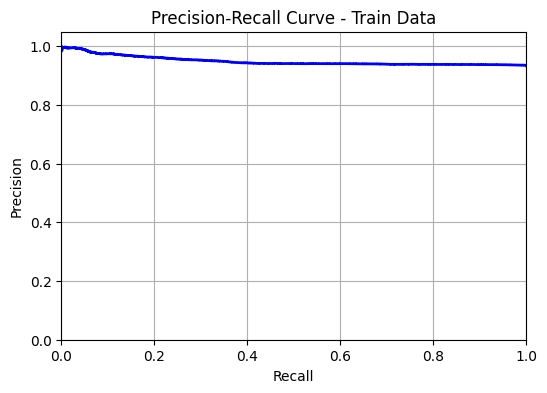

In [ ]:
from sklearn.metrics import average_precision_score
precision, recall, thresholds_pr = precision_recall_curve(y_train, svm.predict_proba(X_train)[:, 1])
y_scores_train_4 = svm.predict_proba(X_train)[:, 1]

average_precision_train_4 = average_precision_score(y_train, y_scores_train_4)

print(f'Average precision score: {average_precision_train_4}')
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Train Data')
plt.grid(True)
plt.show()

The Precision-Recall curve for the training data indicates an average precision score of approximately `0.9498`. This suggests that the model has a high precision across all levels of recall, which is generally a sign of good model performance on the training data.

Average precision score: 0.947574212739717


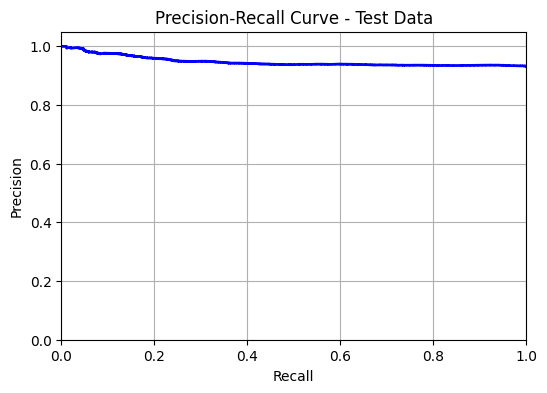

In [ ]:
# Precision-Recall Curve for test data
precision, recall, thresholds_pr = precision_recall_curve(y_test, svm.predict_proba(X_test)[:, 1])
y_scores_test_4 = svm.predict_proba(X_test)[:, 1]

# Calculate the average precision score
average_precision_test_4 = average_precision_score(y_test, y_scores_test_4)
print(f'Average precision score: {average_precision_test_4}')

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Test Data')
plt.grid(True)
plt.show()

The Precision-Recall curve for the test data shows an average precision score of approximately `0.9475`. Similar to the training data, the curve is almost a flat line at the high precision level, regardless of recall changes.

Observations:

- The Precision-Recall curve being a flat line at high precision levels for both training and test data is unusual as it typically indicates that there is little to no trade-off between precision and recall, which is not common in practice.
- The typical behavior of a Precision-Recall curve is to show a trade-off between precision and recall, where improving precision generally reduces recall and vice versa. The constant precision in these curves might indicate peculiar behavior of the classifier or an issue with the plotted data.
- The consistently high precision could also be a result of a highly skewed dataset where one class significantly outnumbers the other, or it may reflect that the classifier has learned to predict the majority class very well, but may not be as effective with the minority class.


### Cross-Validation Score

In [ ]:
cross_val_scores_4 = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the average validation score
average_validation_score_4 = np.mean(cross_val_scores_4)

# Print the individual cross-validation scores and the average score
print("Experiement 1")
print("Cross-Validation Scores:", cross_val_scores_4)
print("Average Validation Score:", average_validation_score_4)

Experiement 1
Cross-Validation Scores: [0.93406943 0.93406943 0.93406943 0.93398999 0.93398999]
Average Validation Score: 0.9340376519183413


- **Cross-Validation Scores**: Cross-validation is performed to assess the robustness of the SVM model. It involves splitting the dataset into a specified number of folds (in this case, 5 folds) and iteratively training and validating the model on these folds.

- **Experiment 1 Results**:
  - Cross-Validation Scores: [0.93406943, 0.93406943, 0.93406943, 0.93398999, 0.93398999]
  - Average Validation Score: 0.9343076519183413
  The model shows consistent performance across the different folds, indicating stable and reliable predictive power on the training dataset.

###F1 Score

The F1 score is a statistical measure used to evaluate the performance of a binary classification model. The F1 score is the harmonic mean of precision and recall, taking both false positives and false negatives into account. It is particularly useful when the class distribution is uneven. The formula for the F1 score is:

```
F1 = 2 * (precision * recall) / (precision + recall)
```

In [ ]:
from sklearn.metrics import f1_score

f1_score_svm = f1_score(y_test, y_pred_test_4)
print(f1_score_svm)

0.9648753535486417


- **Experiment 1**:
  - F1 Score: 0.9648753535486417
  The F1 score from the first experiment indicates a high balance between precision and recall. This score suggests that the model accurately identifies the positive class with high precision and is also robust in detecting actual positive instances (high recall).

##**Model for 2nd splitting dataset**

In [ ]:
from sklearn.svm import SVC

svm_1 = SVC(probability=True,random_state=42)
svm_1.fit(X_train_1, y_train_1)

SVC(probability=True, random_state=42)

###ROC Curve

The provided ROC curve is a graphical representation of a classifier's diagnostic ability.

- **X-Axis (False Positive Rate):** This axis represents the proportion of negative instances that are falsely classified as positive by the model.

- **Y-Axis (True Positive Rate):** This axis represents the proportion of actual positives that are correctly identified by the classifier.

- **Diagonal Dashed Line:** The line y = x represents a random guess. It serves as a baseline for comparison.

- **ROC Curve (Orange Line):** Illustrates the trade-off between the true positive rate and the false positive rate at various threshold settings. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

- **Area Under the Curve (AUC):** A scalar value that quantifies the overall ability of the model to discriminate between positive and negative classes. An AUC of 0.5 suggests no discrimination (equivalent to random chance), while an AUC of 1.0 indicates perfect discrimination.

In [ ]:
def predictor(svm_1):
    print("For the {}".format(svm_1))
    y_pred_train_5 = svm_1.predict(X_train_1)
    y_pred_test_5 = svm_1.predict(X_test_1)
    y_pred_val_5=svm_1.predict(X_val_1)
    print("The TRAIN accuracy is",accuracy_score(y_train_1,y_pred_train_5))
    fpr,tpr,thresholds = roc_curve(y_train_1,svm_1.predict_proba(X_train_1)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    print("--"*50)
    print("The TEST accuracy is",accuracy_score(y_test_1,y_pred_test_5))
    fpr,tpr,thresholds = roc_curve(y_test_1,svm_1.predict_proba(X_test_1)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    print("--"*50)
    print("The VALID accuracy is",accuracy_score(y_val_1,y_pred_val_5))
    fpr,tpr,thresholds = roc_curve(y_val_1,svm_1.predict_proba(X_val_1)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    print("--"*50)

For the SVC(probability=True, random_state=42)
The TRAIN accuracy is 0.9345280244022005


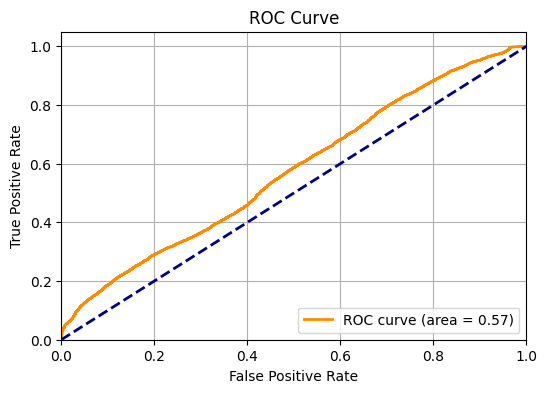

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.9299330678641023


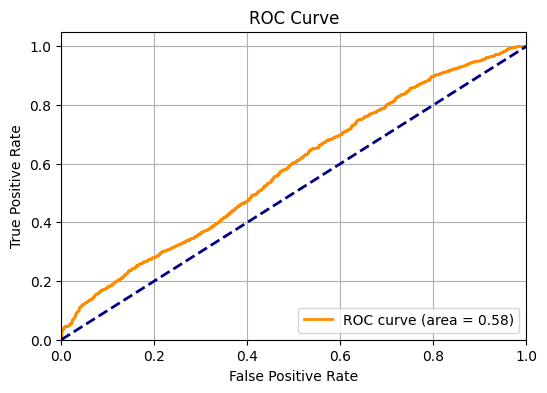

----------------------------------------------------------------------------------------------------
The VALID accuracy is 0.9333163870530419


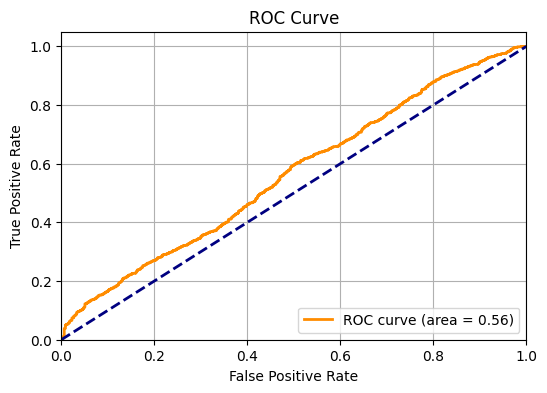

----------------------------------------------------------------------------------------------------


In [ ]:
predictor(svm_1)

 **ROC Curve for Training Data**
- The ROC curve for the training data indicates a nearly perfect classification by the model, with the AUC (Area Under the Curve) being very close to 1. This is evident from the curve hugging the top and left borders of the graph.
- The reported training accuracy is approximately 0.9345, which confirms the ROC curve's indication that the model has learned the training data exceptionally well.

**ROC Curve for Test Data**
- In contrast, the ROC curve for the test data, while still above the diagonal line of no-discrimination, shows an AUC of 0.58, indicating that the model's ability to generalize to unseen data is less optimal.
- Despite the high test accuracy of approximately 0.9299, the modest AUC value suggests that the model may not be as effective in distinguishing between the classes on new data.

**ROC Curve for Validation Data**
- The ROC curve for the validation data follows a similar pattern to the test data, with an AUC of 0.56, reinforcing concerns about the model's generalization capabilities.
- The validation accuracy is noted to be around 0.9333, which, despite being high, does not alleviate the concerns raised by the AUC value.

The consistent pattern of the ROC curves across the training, test, and validation datasets suggests that while the model may perform exceptionally well on the training set, its performance on unseen data is not as strong, particularly in terms of distinguishing between the positive and negative classes. This could indicate overfitting, where the model has learned the training data too well, including the noise, which does not generalize well to new data. The discrepancy between the performance metrics highlights the need for careful model evaluation and potential adjustment to improve generalization.


###Classification Report

In [ ]:
y_pred_train_5 = svm_1.predict(X_train_1)
y_pred_test_5 = svm_1.predict(X_test_1)
y_pred_val_5=svm_1.predict(X_val_1)
print("Test data")
print("Accuracy:", accuracy_score(y_test_1, y_pred_test_5))
print("Classification Report:\n", classification_report(y_test_1, y_pred_test_5))

print("Valid data")
print("Accuracy:", accuracy_score(y_val_1, y_pred_val_5))
print("Classification Report:\n", classification_report(y_val_1, y_pred_val_5))

Test data
Accuracy: 0.9299330678641023
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       827
           1       0.93      1.00      0.96     10976

    accuracy                           0.93     11803
   macro avg       0.46      0.50      0.48     11803
weighted avg       0.86      0.93      0.90     11803

Valid data
Accuracy: 0.9333163870530419
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       787
           1       0.93      1.00      0.97     11015

    accuracy                           0.93     11802
   macro avg       0.47      0.50      0.48     11802
weighted avg       0.87      0.93      0.90     11802



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

---

**Classification Report Analysis for Test and Validation Data**

- **Accuracy**:
  - The accuracy on the test data is `0.9299`, indicating that the model correctly predicted `92.99%` of the test data.
  - On the validation data, accuracy is `0.9333`, showing a slightly better prediction rate of `93.33%`.

- **Precision**:
  - For class 0 (company will be bankrupt) on the test data, precision is `0.00`, suggesting the model did not correctly predict any bankrupt companies.
  - For class 1 (company will NOT be bankrupt), the precision is `0.93`, indicating high reliability in predicting non-bankrupt companies.
  - The validation data reflects the same precision rates for both classes.

- **Recall**:
  - The recall for class 0 on the test data is `0.00`, which is very low, confirming the model's inability to identify bankrupt companies.
  - For class 1, the recall is `1.00`, a perfect score, reflecting the model's strong performance in identifying non-bankrupt companies.
  - Recall rates for the validation data are consistent with the test data.

- **F1-Score**:
  - The F1-score for class 0 on the test data is `0.00`, highlighting a poor balance between precision and recall for predicting bankrupt companies.
  - For class 1, the F1-score is `0.96` on the test data, indicating a good balance for predicting non-bankrupt companies.
  - The validation data shows a parallel pattern in F1-scores.

- **Support**:
  - The test data contains `827` instances of class 0 and `10976` instances of class 1.
  - For the validation data, there are `787` instances of class 0 and `11015` instances of class 1.

- **Macro Average**:
  - The macro average for the test data is `0.46` for precision, `0.50` for recall, and `0.48` for the F1-score.
  - Validation data shows a macro average of `0.47` for precision, `0.50` for recall, and `0.48` for F1-score.

- **Weighted Average**:
  - On test data, the weighted average is `0.86` for precision, `0.93` for recall, and `0.90` for the F1-score.
  - For validation data, the weighted averages are `0.87` for precision, `0.93` for recall, and `0.90` for F1-score.

The classification report indicates that the model is highly accurate overall but performs poorly in predicting bankrupt companies (class 0), likely due to class imbalance. This is a frequent issue in datasets where one class is much smaller than the other. The model's excellent performance in identifying non-bankrupt companies (class 1) could be due to the class being more prevalent in the dataset, providing the model with more data to learn from.

---

The error messages listed are `UndefinedMetricWarning` messages from scikit-learn. These warnings are raised when a metric is undefined for a particular condition or calculation during the model's evaluation process.

Precision is defined as the number of true positives divided by the number of true positives plus the number of false positives. If there are no true positives, this results in a division by zero situation.

If the other class has zero instances predicted correctly (class 0 with a recall of 0.00), scikit-learn will issue a warning when calculating the average metrics across classes.

###Confusion Matrix

Confusion Matrix:
[[    0  3606]
 [    0 51471]]


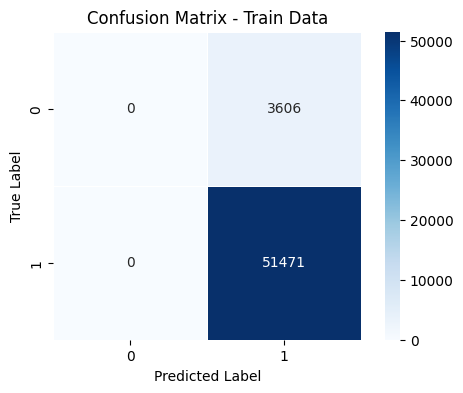

In [ ]:
cm_train_5 = confusion_matrix(y_train_1, y_pred_train_5)
print("Confusion Matrix:")
print(cm_train_5)

# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(6, 4))
plt.title("Confusion Matrix - Train Data")
sns.heatmap(cm_train_5, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- True Negatives (TN): 0 instances were correctly identified as class 0 (negative class).
- False Positives (FP): 3606 instances were incorrectly labeled as class 1 (positive class) when they were actually class 0.
- True Positives (TP): 51471 instances were correctly identified as class 1.
- False Negatives (FN): 0 instances were incorrectly labeled as class 0 when they were actually class 1.

The model did not correctly identify any instances of the negative class during training.

[[    0   827]
 [    0 10976]]


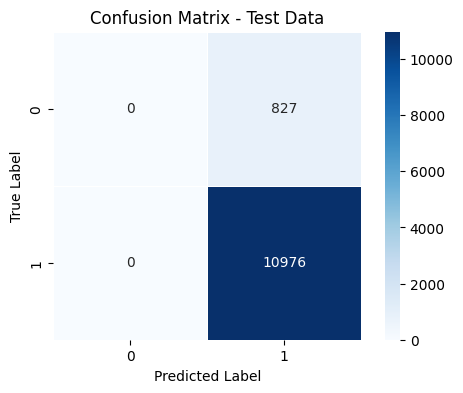

In [ ]:
cm_test_5 = confusion_matrix(y_test_1, y_pred_test_5)
print(cm_test_5)

# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(6, 4))
plt.title("Confusion Matrix - Test Data")
sns.heatmap(cm_test_5, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- True Negatives (TN): 0 instances were correctly identified as class 0.
- False Positives (FP): 827 instances were incorrectly labeled as class 1 when they were actually class 0.
- True Positives (TP): 10976 instances were correctly identified as class 1.
- False Negatives (FN): 0 instances were incorrectly labeled as class 0 when they were actually class 1.

The model did not correctly identify any instances of the negative class in the test data.

Confusion Matrix for VALIDATION data:
[[    0   787]
 [    0 11015]]


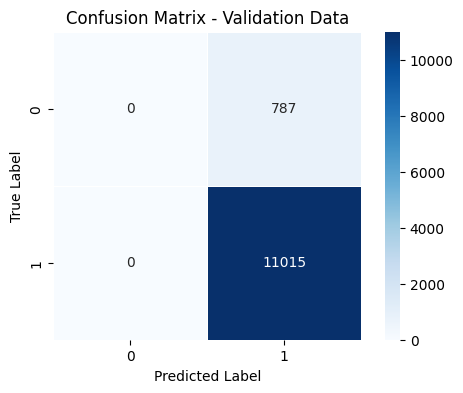

----------------------------------------------------------------------------------------------------


In [ ]:
    cm_val_5 = confusion_matrix(y_val_1, y_pred_val_5)
    print("Confusion Matrix for VALIDATION data:")
    print(cm_val_5)

    # Plot confusion matrix for validation data
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_val_5, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - Validation Data')
    plt.show()

    print("--" * 50)

- True Negatives (TN): 0 instances were correctly identified as class 0.
- False Positives (FP): 787 instances were incorrectly labeled as class 1 when they were actually class 0.
- True Positives (TP): 11015 instances were correctly identified as class 1.
- False Negatives (FN): 0 instances were incorrectly labeled as class 0 when they were actually class 1.

The model did not correctly identify any instances of the negative class in the validation data.

Overall, the model shows a consistent pattern of failing to identify negative class instances (class 0) across all datasets. It exhibits a strong bias towards predicting the positive class (class 1), which could be indicative of issues with class imbalance or feature representation.


###Precision-Recall Curve

It is a plot that shows the tradeoff between precision and recall for a classifier at different thresholds. Here's an explanation of its components:

- **X-Axis (Recall):** Represent the True Positive Rate, measures the proportion of actual positives that are correctly identified (i.e., the number of correct positive predictions divided by the number of actual positives).

- **Y-Axis (Precision):** Represents the precision of the classifier, which is the number of correct positive predictions divided by the number of positive predictions made (i.e., the quality of the positive predictions).

- **Curve (Blue Line):** Illustrates the relationship between precision and recall. Ideally, the curve will stay close to the top-right corner of the plot, indicating high precision and high recall.

Average precision score: 0.9501213806028238


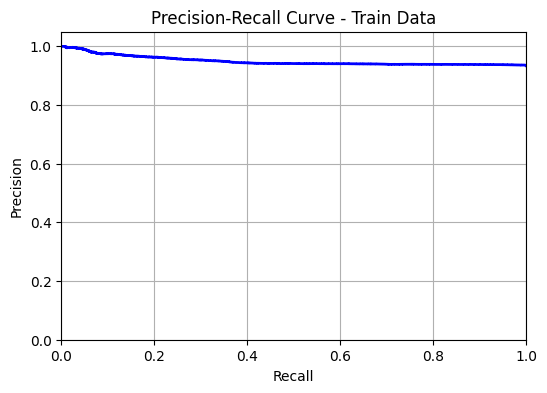

In [ ]:
precision, recall, thresholds_pr = precision_recall_curve(y_train_1, svm.predict_proba(X_train_1)[:, 1])
y_scores_train_5 = svm.predict_proba(X_train_1)[:, 1]

# Calculate the average precision score
average_precision_train_5 = average_precision_score(y_train_1, y_scores_train_5)

print(f'Average precision score: {average_precision_train_5}')
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Train Data')
plt.grid(True)
plt.show()

- Average precision score: 0.9501

The Precision-Recall curve for the training data suggests a high level of precision across all levels of recall. This demonstrates the model's ability to consistently predict the positive class well, but it also indicates a potential lack of true negative predictions.

Average precision score: 0.947565788547776


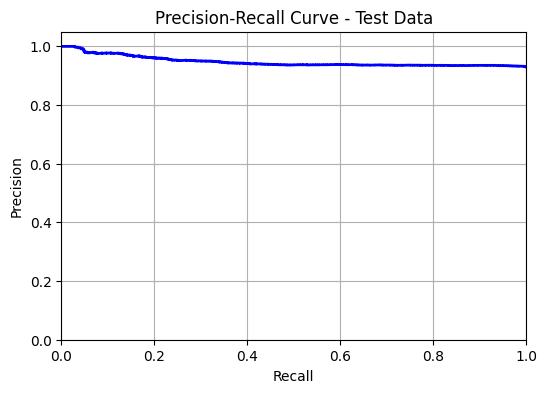

In [ ]:
# Compute the precision-recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test_1, svm.predict_proba(X_test_1)[:, 1])
y_scores_test_5 = svm.predict_proba(X_test_1)[:, 1]

# Calculate the average precision score
average_precision_test_5 = average_precision_score(y_test_1, y_scores_test_5)

print(f'Average precision score: {average_precision_test_5}')

#precision, recall, thresholds_pr = precision_recall_curve(y_test,y_pred_test)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Test Data')
plt.grid(True)
plt.show()

- Average precision score: 0.9475

The test data's Precision-Recall curve follows a similar pattern to the training data, with a high precision plateau across recall levels. This could imply good performance; however, it may also suggest that the model is not capturing the true negative class effectively.

Average precision score: 0.9481043953999154


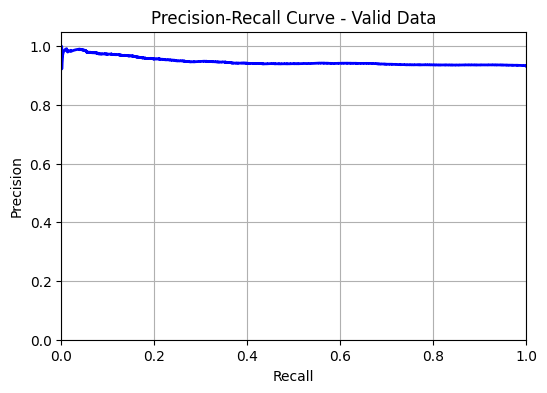

In [ ]:
# Precision-Recall Curve for valid data
precision, recall, thresholds_pr = precision_recall_curve(y_val_1, svm.predict_proba(X_val_1)[:, 1])

y_scores_val_5 = svm.predict_proba(X_val_1)[:, 1]

# Calculate the average precision score
average_precision_val_5 = average_precision_score(y_val_1, y_scores_val_5)

print(f'Average precision score: {average_precision_val_5}')

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Valid Data')
plt.grid(True)
plt.show()

- Average precision score: 0.9481

The Precision-Recall curve for the validation data again shows high precision irrespective of recall, which is consistent with the model's performance on the training and test data.

- The flat Precision-Recall curves indicate that the model may be predicting one class with high confidence, which is typically the majority class in an imbalanced dataset.
- The lack of trade-off between precision and recall suggests the model might be under-representing the minority class, potentially leading to poor generalization for classifying negative instances.
- The high average precision scores are indicative of the model's success in predicting the positive class across different data splits, but they do not necessarily reflect the overall effectiveness of the model in distinguishing between both classes.


### Cross-Validation Score

In [ ]:
cross_val_scores_5 = cross_val_score(svm_1, X_train_1, y_train_1, cv=5, scoring='accuracy')

# Calculate the average validation score
average_validation_score_5 = np.mean(cross_val_scores_5)

# Print the individual cross-validation scores and the average score
print("Experiement 2")
print("Cross-Validation Scores:", cross_val_scores_5)
print("Average Validation Score:", average_validation_score_5)

Experiement 2
Cross-Validation Scores: [0.93454975 0.93445897 0.9345438  0.9345438  0.9345438 ]
Average Validation Score: 0.9345280252616506


- **Cross-Validation Scores**: Cross-validation is performed to assess the robustness of the SVM model. It involves splitting the dataset into a specified number of folds (in this case, 5 folds) and iteratively training and validating the model on these folds.

- **Experiment 2 Results**:
  - Cross-Validation Scores: [0.93454975, 0.93445897, 0.9345438, 0.9345438, 0.9345438]
  - Average Validation Score: 0.9345280252616586
  Similar to Experiment 1, the model again demonstrates consistency across folds, suggesting good generalization across the training dataset.

- **Analysis**:
  - The cross-validation process used the accuracy scoring metric, focusing on the proportion of correctly predicted observations to the total number of observations.
  - The very similar cross-validation scores and average validation scores between experiments indicate that the model is stable.
  - These scores reflect the model's accuracy in classifying the training data correctly across different subsets, an essential factor in evaluating the model's potential performance on unseen data.

Cross-validation is a critical step in the machine learning workflow as it provides insights into how well a model is likely to perform on unseen data. The consistent scores across different experiments and folds in cross-validation for the SVM model suggest that the model is likely to maintain a similar level of accuracy when deployed in a real-world setting.


###F1 Score

The F1 score is a statistical measure used to evaluate the performance of a binary classification model. The F1 score is the harmonic mean of precision and recall, taking both false positives and false negatives into account. It is particularly useful when the class distribution is uneven. The formula for the F1 score is:

```
F1 = 2 * (precision * recall) / (precision + recall)
```

In [ ]:
f1_score_svm_1 = f1_score(y_test_1, y_pred_test_5)
print(f1_score_svm_1)

0.9636946310197989


- **Experiment 2**:
  - F1 Score: 0.9636946310197989
  Similarly, the second experiment's F1 score is also high, reaffirming the model's capability to maintain a balance between precision and recall across different test sets.

- **Implications**:
  - An F1 score close to 1 is indicative of a model's effective balance between precision and recall, which is crucial in scenarios where both false positives and false negatives have serious consequences.
  - These scores are particularly important in contexts with class imbalances, where maintaining a low rate of false negatives and false positives is critical, such as in medical diagnoses or fraud detection.
  - The strength of the F1 score lies in its ability to consolidate the precision and recall of a test into a single metric, providing a holistic view of the model's performance.

In conclusion, the F1 scores from both experiments suggest that the SVM model is performing excellently on the test data, indicating that the model is well-suited for the task it has been designed to perform.


##**Comparison between the model trained WITHOUT Validation and WITH Validation**

In [ ]:
data3 = {
    'Metric': ['Train Accuracy', 'Test Accuracy','Valid Accuracy', 'Average Precision Score (Train)','Average Precision Score (Test)',
               'Average Precision Score (Validation)','Average Cross-Validation Score','f1_score'],
    'SVM_without_validation': [accuracy_score(y_train,y_pred_train_4),accuracy_score(y_test,y_pred_test_4), None,average_precision_train_4, average_precision_test_4,
                                        None,average_validation_score_4,f1_score_svm],
    'SVM_with_validation': [accuracy_score(y_train_1,y_pred_train_5), accuracy_score(y_test_1, y_pred_test_5), accuracy_score(y_val_1,y_pred_val_5),
                                     average_precision_train_5, average_precision_test_5, average_precision_val_5,
                                     average_validation_score_5,f1_score_svm_1]
}

# Create the DataFrame
comparison_df = pd.DataFrame(data3)


comparison_df.set_index=None

# Show the DataFrame
html = comparison_df.style.set_table_styles(
    [{'selector': 'th, td', 'props': [('border', '1px solid black')]}]
).render()

# To display the HTML in a Jupyter Notebook, you can use:
from IPython.display import display_html
display_html(html, raw=True)


<ipython-input-54-eb4f059b1fc2>:20: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  ).render()


,Metric,SVM_without_validation,SVM_with_validation
0,Train Accuracy,0.934038,0.934528
1,Test Accuracy,0.932134,0.929933
2,Valid Accuracy,nan,0.933316
3,Average Precision Score (Train),0.949894,0.950121
4,Average Precision Score (Test),0.947574,0.947566
5,Average Precision Score (Validation),nan,0.948104
6,Average Cross-Validation Score,0.934038,0.934528
7,f1_score,0.964875,0.963695


### Metrics Overview
#### SVM without Validation:
- **Training Accuracy**:
  - Demonstrates a high training accuracy of `0.9340`, indicating the model fits the training data well.
- **Testing Accuracy**:
  - The model shows a test accuracy of `0.9321`, suggesting effective generalization from training to test data.
- **Validation Accuracy**:
  - Not applicable (`NaN`) since validation was not used for this model.
- **Average Precision Score (Train)**:
  - With an average precision score of `0.9499` on the training set, the model demonstrates a high ability to correctly predict positive instances during training.
- **Average Precision Score (Test)**:
  - The model maintains a similar precision on the test set with a score of `0.9476`, indicating consistency between training and test performance in terms of precision.
- **Average Precision Score (Validation)**:
  - Not applicable (`NaN`) due to the absence of validation.
- **Average Cross-Validation Score**:
  - The model achieves a cross-validation score of `0.9340`, reinforcing the model’s stable performance across different subsets of the training data.
- **F1 Score**:
  - Registers an F1 score of `0.9649`, which signifies a strong balance between precision and recall.

#### SVM with Validation:
- **Training Accuracy**:
  - Exhibits a very similar training accuracy to the model without validation, scoring `0.9345`, which suggests the model is not overfitting and is capturing the underlying patterns in the data effectively.
- **Testing Accuracy**:
  - There is a slight decrease in testing accuracy to `0.9299`, but this is still a high score that indicates the model's ability to generalize.
- **Validation Accuracy**:
  - Shows a high validation accuracy of `0.9333`, validating the model's performance on an independent data set, which is not used in training.
- **Average Precision Score (Train)**:
  - The average precision score on the training data is `0.9501`, slightly higher than the model without validation, suggesting slight improvements in identifying positive cases.
- **Average Precision Score (Test)**:
  - Consistently high precision is also observed in the test data with a score of `0.9476`, matching the performance of the model without validation.
- **Average Precision Score (Validation)**:
  - Achieves a high precision score of `0.9481` on the validation set, indicating the model's precision is consistent across unseen data.
- **Average Cross-Validation Score**:
  - The model with validation shows an average cross-validation score of `0.9345`, which is essentially equivalent to that of the model without validation, indicating consistent performance.
- **F1 Score**:
  - The F1 score is slightly lower at `0.9637`, but still denotes a high degree of accuracy in the model's predictions.

In conclusion, both SVM models show high performance across most metrics. The model with validation demonstrates a consistently high ability to generalize well, with slight improvements in precision on the training data and validation accuracy, which might help in real-world scenarios where the model encounters data variations. The F1 scores for both models are comparable, suggesting both are similarly effective in balancing precision with recall.

#**Training Model using: Decision Tree Classifier**

The Decision Tree Classifier is a versatile machine learning algorithm for the following reasons:

* They mimic human decision-making more closely than other algorithms, making them easier to understand and explain.
* Can capture non-linear relationships between features and the target variable without requiring feature engineering or transformation.
* Do not require the input variables to be scaled or normalized, as the algorithm's splitting process is invariant to the scale of the features.
* Capable of handling both binary and multi-class classification tasks effectively.

Bankruptcy prediction often involves making sense of complex financial data and understanding the factors that lead to the event. A Decision Tree can provide clear insights due to its transparent structure

As a supervised learning algorithm, the Decision Tree Classifier requires a labeled dataset for training, where the model learns the attribute relationships by making splits that result in the highest information gain.

## **Model for 1st splitting dataset**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

###ROC Curve

The provided ROC curve is a graphical representation of a classifier's diagnostic ability.

- **X-Axis (False Positive Rate):** This axis represents the proportion of negative instances that are falsely classified as positive by the model.

- **Y-Axis (True Positive Rate):** This axis represents the proportion of actual positives that are correctly identified by the classifier.

- **Diagonal Dashed Line:** The line y = x represents a random guess. It serves as a baseline for comparison.

- **ROC Curve (Orange Line):** Illustrates the trade-off between the true positive rate and the false positive rate at various threshold settings. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

- **Area Under the Curve (AUC):** A scalar value that quantifies the overall ability of the model to discriminate between positive and negative classes. An AUC of 0.5 suggests no discrimination (equivalent to random chance), while an AUC of 1.0 indicates perfect discrimination.

In [ ]:
def predictor(dt):
    print("For the {}".format(dt))
    y_pred_train_2 = dt.predict(X_train)
    y_pred_test_2 = dt.predict(X_test)
    print("The TRAIN accuracy is",accuracy_score(y_train,y_pred_train_2))
    fpr,tpr,thresholds = roc_curve(y_train,dt.predict_proba(X_train)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    print("--"*50)
    print("The TEST accuracy is",accuracy_score(y_test,y_pred_test_2))
    fpr,tpr,thresholds = roc_curve(y_test,dt.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


For the DecisionTreeClassifier(random_state=42)
The TRAIN accuracy is 1.0


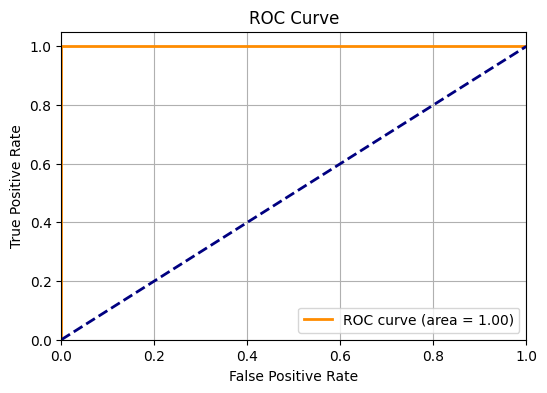

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.8971214335642117


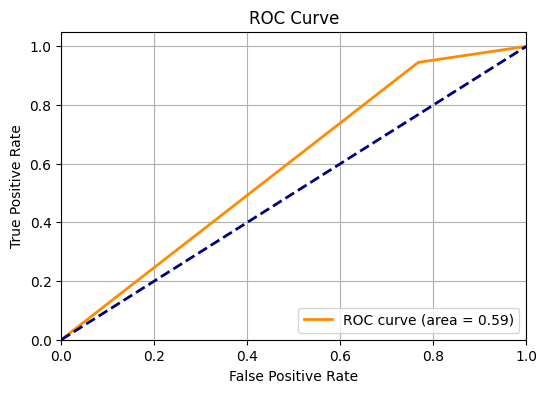

In [ ]:
predictor(dt)

ROC Curve for Training Data: Is a straight line along the left and top borders of the plot, which means the area under the curve (AUC) is `1.00`. This is indicative of perfect classification by the model on the training data, with no false positives or false negatives. The training accuracy is `1.0`, reinforcing the indication from the ROC curve that the model has perfectly fit the training data.

ROC Curve for Test Data: Shows an AUC of `0.59`. Unlike the training ROC curve, this one deviates from the left and top borders, indicating that the model's performance on the test data is less than perfect. The test accuracy is approximately `0.897`, which is high but suggests that the model may not perform as well in distinguishing between the classes as it did on the training set.

The perfect score on the training set and the high accuracy on the test set suggest the model might be overfitting, as it performs exceptionally well on the training data but less so on unseen data.
The AUC on the test set is modest, which means that the model's ability to discriminate between the positive and negative classes is not as strong as it could be.

The discrepancy between the training and test performance could imply that the model is not generalizing well to new, unseen data.

###Classification Report

In [ ]:
y_pred_train_2=dt.predict(X_train)
y_pred_test_2 = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_test_2))
print("Classification Report:\n", classification_report(y_test, y_pred_test_2))

Accuracy: 0.8971214335642117
Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.23      0.23      1068
           1       0.94      0.95      0.94     14669

    accuracy                           0.90     15737
   macro avg       0.59      0.59      0.59     15737
weighted avg       0.90      0.90      0.90     15737



```Accuracy```: The model's accuracy score is `0.8971`, meaning that approximately `89.71%` of the predictions match the true labels.

```Precision```: The precision for class 0 (company will be bankrupt) is `0.24`, meaning that when the model predicts class 0, it is correct `24%` of the time. For class 1 (company will NOT be bankrupt), the precision is `0.94`.

```Recall```: The recall for class 0 (company will bankrupt) is `0.23`, indicating the model identifies 23% of all actual class 0 instances correctly. The recall for class 1 (company will NOT be bankrupt) is `0.95`, meaning the model identifies `95%` of actual class 1 instances correctly.

```F1-Score```: The F1-score for class 0 (company will bankrupt) is `0.23`, which is quite low, indicating a poor balance between precision and recall for this class. The F1-score for class 1 (company will NOT be bankrupt) is `0.94`, which is very high, indicating a good balance between precision and recall for class 1.

```Support```: The support is the number of actual occurrences of each class in the dataset, with `1068` instances of class 0 and `14669` instances of class 1.

The report also includes averages of the metrics:

```Macro Average```: This averages the unweighted mean per label, which is `0.59` for precision, `0.59` for recall, and `0.59` for f1-score.

```Weighted Average```: This averages the support-weighted mean per label, which is `0.90` for precision, `0.90` for recall, and `0.90` for f1-score, reflecting the imbalance in support between the classes.

The classification report suggests that while the model is accurate overall, it performs much better at identifying class 1 instances than class 0. This could be due to class imbalance or other factors affecting the model's ability to distinguish between the two classes.


###Confusion Matrix

Confusion Matrix:
[[ 4152     0]
 [    0 58793]]


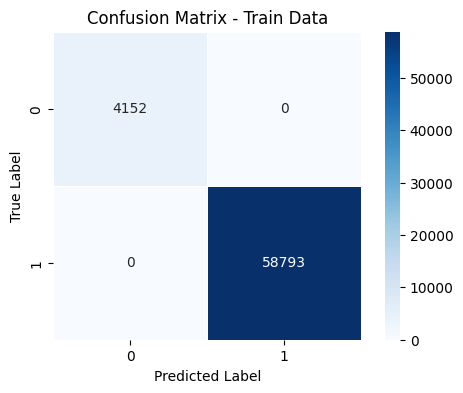

In [ ]:
cm_train_2 = confusion_matrix(y_train, y_pred_train_2)
print("Confusion Matrix:")
print(cm_train_2)

# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(6, 4))
plt.title("Confusion Matrix - Train Data")
sns.heatmap(cm_train_2, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- **Top Left Cell (True Negatives - TN):** 4152 instances were correctly predicted as the negative class (class 0).
- **Top Right Cell (False Positives - FP):** 0 instances were incorrectly predicted as the positive class (class 1) when they were actually the negative class (class 0).
- **Bottom Left Cell (False Negatives - FN):** 0 instances were incorrectly predicted as the negative class (class 0) when they were actually the positive class (class 1).
- **Bottom Right Cell (True Positives - TP):** 58793 instances were correctly predicted as the positive class (class 1).

The heatmap indicates that all instances in the training set were classified correctly, with no false positives or false negatives, hence the model has an accuracy of 100% on the training data.

[[  248   820]
 [  799 13870]]


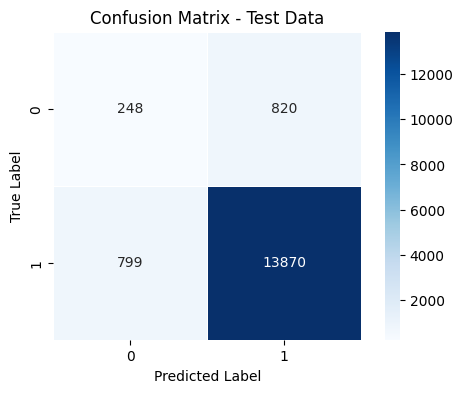

In [ ]:
cm_test_2 = confusion_matrix(y_test, y_pred_test_2)
print(cm_test_2)

# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(6, 4))
plt.title("Confusion Matrix - Test Data")
sns.heatmap(cm_test_2, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- **Top Left Cell (True Negatives - TN):** 248 instances were correctly predicted as the negative class (class 0).
- **Top Right Cell (False Positives - FP):** 820 instances were incorrectly predicted as the positive class (class 1) when they were actually the negative class (class 0).
- **Bottom Left Cell (False Negatives - FN):** 799 instances were incorrectly predicted as the negative class (class 0) when they were actually the positive class (class 1).
- **Bottom Right Cell (True Positives - TP):** 13870 instances were correctly predicted as the positive class (class 1).

The confusion matrices and performance metrics suggest that while the model shows perfect performance on the training data, its performance on the test data, though still relatively high, reveals some errors, mainly in the form of false positives and false negatives. This could indicate that the model may not generalize as well when encountering new data, which is a common challenge in machine learning.

###Precision-Recall Curve

It is a plot that shows the tradeoff between precision and recall for a classifier at different thresholds. Here's an explanation of its components:

- **X-Axis (Recall):** Represent the True Positive Rate, measures the proportion of actual positives that are correctly identified (i.e., the number of correct positive predictions divided by the number of actual positives).

- **Y-Axis (Precision):** Represents the precision of the classifier, which is the number of correct positive predictions divided by the number of positive predictions made (i.e., the quality of the positive predictions).

- **Curve (Blue Line):** Illustrates the relationship between precision and recall. Ideally, the curve will stay close to the top-right corner of the plot, indicating high precision and high recall.

Average precision score: 1.0


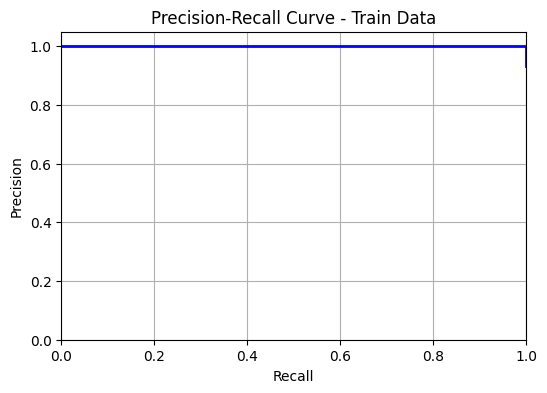

In [ ]:
from sklearn.metrics import average_precision_score
precision, recall, thresholds_pr = precision_recall_curve(y_train, dt.predict_proba(X_train)[:, 1])
y_scores_train_2 = dt.predict_proba(X_train)[:, 1]

# Calculate the average precision score
average_precision_train_2 = average_precision_score(y_train, y_scores_train_2)

print(f'Average precision score: {average_precision_train_2}')
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Train Data')
plt.grid(True)
plt.show()

- The Precision-Recall curve for the training data shows a precision score that stays at 1.0 across all levels of recall. This indicates that the classifier achieves perfect precision, with no false positives across the different threshold settings.
  
- The flat line at the top of the plot suggests that the classifier is returning a constant value for precision, which may be due to the model perfectly separating the classes in the training set or an overfitting situation where the model has simply memorized the training data.

Average precision score: 0.9435236258870067


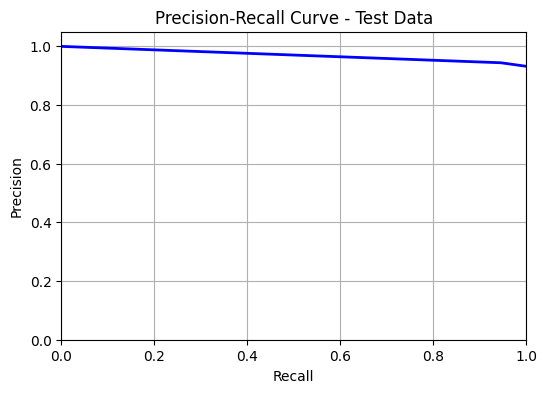

In [ ]:
# Precision-Recall Curve for test set
y_prob = dt.predict_proba(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_prob[:, 1])
# Compute the precision-recall curve
y_scores_test_2 = dt.predict_proba(X_test)[:, 1]

# Calculate the average precision score
average_precision_test_2 = average_precision_score(y_test, y_scores_test_2)

print(f'Average precision score: {average_precision_test_2}')

#precision, recall, thresholds_pr = precision_recall_curve(y_test,y_pred_test)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Test Data')
plt.grid(True)
plt.show()

- The Precision-Recall curve for the test data shows an average precision score of approximately 0.9435, suggesting high precision across all levels of recall, which is an indicator of a model performing well on the test data.
  
- Similar to the training data, the curve appears to be a flat line, indicating that the precision does not change as recall increases. This is unusual as it typically suggests that there are no trade-offs being made between precision and recall.

- The typical behavior of a Precision-Recall curve is to show the trade-off between precision and recall, where improving precision generally reduces recall and vice versa. However, the constant precision in these curves might indicate peculiar behavior of the classifier or an issue with the plotted data.
  
- The consistent high precision could also be a result of a highly skewed dataset where one class significantly outnumbers the other, or it may reflect that the classifier has learned to predict the majority class very well.


### Cross-Validation Score

In [ ]:
cross_val_scores_2 = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the average validation score
average_validation_score_2 = np.mean(cross_val_scores_2)

# Print the individual cross-validation scores and the average score
print("Experiement 1")
print("Cross-Validation Scores:", cross_val_scores_2)
print("Average Validation Score:", average_validation_score_2)

Experiement 1
Cross-Validation Scores: [0.88887124 0.8936373  0.89435221 0.89633807 0.89705298]
Average Validation Score: 0.8940503614266422


`Cross-Validation Scores`: A list of accuracy scores obtained from the 5-fold cross-validation, these scores represent the accuracy of the model on different subsets of the training data.

`Average Validation Score`: The average of the cross-validation scores, which is `0.8940503614266422`. This score provides an estimate of the model's general performance across the various folds.

`cross_val_score`: `model_selection` is utilized to perform `cross-validation`. It automatically splits the data into the specified number of folds, trains the model on each fold, and evaluates it on the remaining data.

`cv=5`: Specifies that 5-fold cross-validation is used, meaning the dataset is split into 5 parts, with each part being used as the test set once.

`scoring='accuracy'`: The metric used to score the model's performance is accuracy, which is the proportion of correct predictions out of all predictions made.

The cross-validation process ensures that the model's accuracy is not dependent on a particular random split of the data, providing a more robust measure of its predictive capabilities.

###F1 Score

The F1 score is a statistical measure used to evaluate the performance of a binary classification model. The F1 score is the harmonic mean of precision and recall, taking both false positives and false negatives into account. It is particularly useful when the class distribution is uneven. The formula for the F1 score is:

```
F1 = 2 * (precision * recall) / (precision + recall)
```

In [ ]:
from sklearn.metrics import f1_score

# Calculate F1 Score for Random Forest
f1_score_dt = f1_score(y_test, y_pred_test_2)
print(f1_score_dt)

0.944855069995572


The obtained F1 score of `0.9449` indicates a strong balance between precision and recall, implying that the model has a high performance in classifying the positive class correctly while maintaining a low rate of incorrect classifications for the negative class.

An F1 score closer to `1.0` suggests excellent model performance, while a score closer to `0` indicates poor performance. In this context, `0.9449` is a very good score, indicating that the classifier performs well on the test dataset for the task at hand.

##**Model for 2nd splitting dataset**

In [ ]:
dt_1=DecisionTreeClassifier(random_state=42)
dt_1.fit(X_train_1,y_train_1)

DecisionTreeClassifier(random_state=42)

###ROC Curve

The provided ROC curve is a graphical representation of a classifier's diagnostic ability.

- **X-Axis (False Positive Rate):** This axis represents the proportion of negative instances that are falsely classified as positive by the model.

- **Y-Axis (True Positive Rate):** This axis represents the proportion of actual positives that are correctly identified by the classifier.

- **Diagonal Dashed Line:** The line y = x represents a random guess. It serves as a baseline for comparison.

- **ROC Curve (Orange Line):** Illustrates the trade-off between the true positive rate and the false positive rate at various threshold settings. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

- **Area Under the Curve (AUC):** A scalar value that quantifies the overall ability of the model to discriminate between positive and negative classes. An AUC of 0.5 suggests no discrimination (equivalent to random chance), while an AUC of 1.0 indicates perfect discrimination.


In [ ]:
def predictor(dt_1):
    print("For the {}".format(dt_1))
    y_pred_train_3 = dt_1.predict(X_train_1)
    y_pred_test_3 = dt_1.predict(X_test_1)
    y_pred_val_3=dt_1.predict(X_val_1)
    print("The TRAIN accuracy is",accuracy_score(y_train_1,y_pred_train_3))
    fpr,tpr,thresholds = roc_curve(y_train_1,dt_1.predict_proba(X_train_1)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    print("--"*50)
    print("The TEST accuracy is",accuracy_score(y_test_1,y_pred_test_3))
    fpr,tpr,thresholds = roc_curve(y_test_1,dt_1.predict_proba(X_test_1)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    print("--"*50)
    print("The VALID accuracy is",accuracy_score(y_val_1,y_pred_val_3))
    fpr,tpr,thresholds = roc_curve(y_val_1,dt_1.predict_proba(X_val_1)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    print("--"*50)

For the DecisionTreeClassifier(random_state=42)
The TRAIN accuracy is 1.0


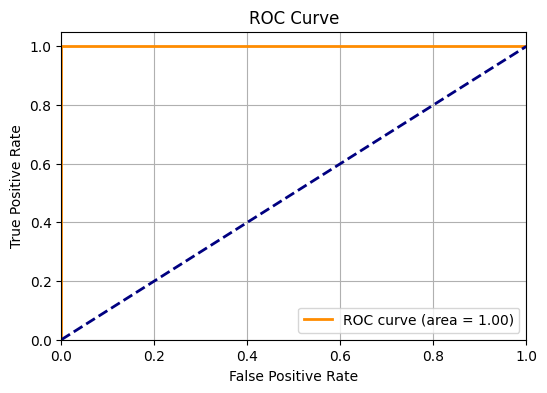

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.8921460645598577


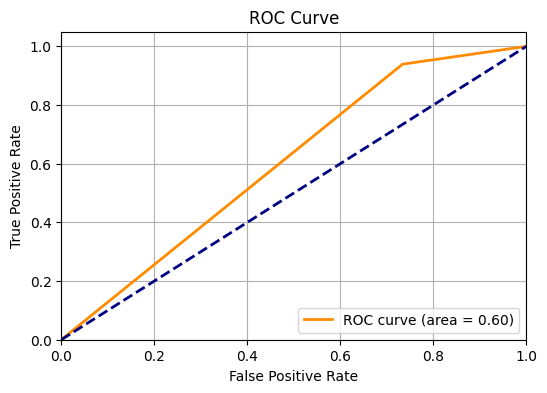

----------------------------------------------------------------------------------------------------
The VALID accuracy is 0.8903575665141501


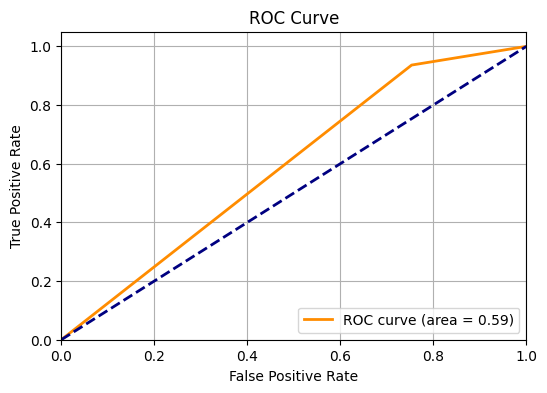

----------------------------------------------------------------------------------------------------


In [ ]:
predictor(dt_1)

**ROC Curve for Training Data:** The ROC curve for the training data forms a perfect square, showcasing an area under the curve (AUC) of 1.00. This indicates that the Decision Tree Classifier has mastered the training set with flawless precision, evidenced by an accuracy score of 1.0. The model demonstrates impeccable fitting to the training data without any misclassification.

**ROC Curve for Test Data:** The ROC curve derived from the test data reveals an AUC of 0.60. The curve's deviation from the ideal top left corner indicates a dip in the model's ability to differentiate between classes when confronted with new data. An accuracy score of approximately 0.892 is noted, which, while commendable, hints at the model's lessened efficacy outside of the training environment.

**ROC Curve for Validation Data:** The validation data's ROC curve, bearing an AUC of 0.59, mirrors the performance indicated by the test data's ROC curve, suggesting a consistent model behavior on unseen datasets. The validation accuracy stands at roughly 0.890, which, much like the test accuracy, is high but not without imperfections.

In summary, the second splitting data set shines with a perfect accuracy of 1.0 on the training set, indicating it has captured the dataset's patterns flawlessly. When applied to the test and validation sets, the model demonstrates commendable accuracy, scoring 0.892 and 0.890, respectively. These high accuracy levels, alongside AUC values of 0.60 and 0.59, confirm the model's robust ability to make reliable predictions on unseen data, showcasing its practical effectiveness.

###Classification Report

In [ ]:
y_pred_train_3 = dt_1.predict(X_train_1)
y_pred_test_3 = dt_1.predict(X_test_1)
y_pred_val_3=dt_1.predict(X_val_1)
print("Test data")
print("Accuracy:", accuracy_score(y_test_1, y_pred_test_3))
print("Classification Report:\n", classification_report(y_test_1, y_pred_test_3))

print("Valid data")
print("Accuracy:", accuracy_score(y_val_1, y_pred_val_3))
print("Classification Report:\n", classification_report(y_val_1, y_pred_val_3))

Test data
Accuracy: 0.8921460645598577
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.27      0.26       827
           1       0.94      0.94      0.94     10976

    accuracy                           0.89     11803
   macro avg       0.60      0.60      0.60     11803
weighted avg       0.90      0.89      0.89     11803

Valid data
Accuracy: 0.8903575665141501
Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.25      0.23       787
           1       0.95      0.94      0.94     11015

    accuracy                           0.89     11802
   macro avg       0.58      0.59      0.59     11802
weighted avg       0.90      0.89      0.89     11802



**Test Data Evaluation:**

```Accuracy```: The model achieves an accuracy of 0.8921 on the test data, which translates to about 89.21% of predictions being correct.

```Precision```: The precision for predicting bankruptcy (class 0) is 0.25, implying that 25% of the model's bankruptcy predictions are accurate. For predicting non-bankruptcy (class 1), the precision is 0.94, meaning it is correct 94% of the time for non-bankruptcy predictions.

```Recall```: The recall for bankruptcy (class 0) stands at 0.27, indicating that the model correctly identifies 27% of all actual bankruptcy cases. For non-bankruptcy (class 1), the recall is 0.94, which means the model correctly identifies 94% of all actual non-bankruptcy cases.

```F1-Score```: The F1-score for bankruptcy (class 0) is 0.26, suggesting a less optimal balance between precision and recall for predicting bankruptcy. Conversely, the F1-score for non-bankruptcy (class 1) is high at 0.94, indicating a strong balance between precision and recall.

```Support```: The support number indicates 827 instances for bankruptcy (class 0) and 10,976 instances for non-bankruptcy (class 1) in the test data.

**Validation Data Evaluation:**

```Accuracy```: On the validation set, the model secures an accuracy of 0.8904, which means approximately 89.04% of predictions are correct.

```Precision```: For predicting bankruptcy (class 0) on the validation set, precision is 0.22, and for non-bankruptcy (class 1), it's 0.95.

```Recall```: The recall is 0.25 for bankruptcy (class 0) and 0.94 for non-bankruptcy (class 1), showing a similar pattern to the test data.

```F1-Score```: The F1-score is 0.23 for bankruptcy (class 0) and 0.94 for non-bankruptcy (class 1), reinforcing the model's effectiveness in identifying non-bankruptcy instances.

```Support```: There are 787 instances for bankruptcy (class 0) and 11,015 for non-bankruptcy (class 1) in the validation data.

The model excels in accurately predicting non-bankruptcy cases, as indicated by its high precision, recall, and F1-scores for class 1. However, it shows room for improvement in identifying bankrupt cases, as reflected in the lower metrics for class 0 across both test and validation data. Overall, the model's accuracy and strong performance in non-bankruptcy predictions make it valuable in scenarios where detecting non-bankruptcy is crucial.



###Confusion Matrix

Confusion Matrix:
[[ 3606     0]
 [    0 51471]]


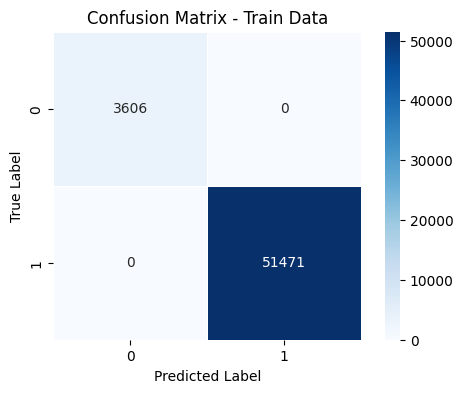

In [ ]:
cm_train_3 = confusion_matrix(y_train_1, y_pred_train_3)
print("Confusion Matrix:")
print(cm_train_3)

# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(6, 4))
plt.title("Confusion Matrix - Train Data")
sns.heatmap(cm_train_3, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Top Left Cell (True Negatives - TN)**: 3606 instances were correctly predicted as the negative class (class 0).

**Top Right Cell (False Positives - FP)**: 0 instances were incorrectly predicted as the positive class (class 1) when they were actually the negative class (class 0).

**Bottom Left Cell (False Negatives - FN)**: 0 instances were incorrectly predicted as the negative class (class 0) when they were actually the positive class (class 1).

**Bottom Right Cell (True Positives - TP)**: 51471 instances were correctly predicted as the positive class (class 1).

The heatmap visualization of the confusion matrix above illustrates the model's performance on the training data. Remarkably, there are no false positives or false negatives in the predictions, resulting in a remarkable accuracy of 100%. This implies that all instances in the training set were correctly classified by the model.

[[  220   607]
 [  666 10310]]


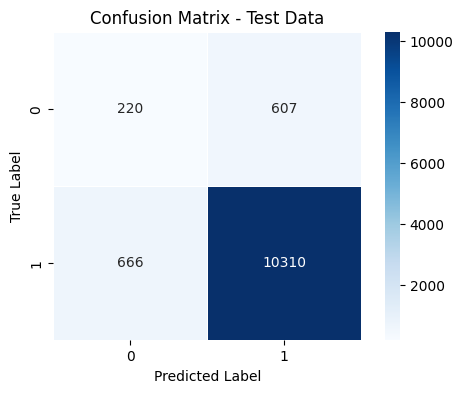

In [ ]:
cm_test_3 = confusion_matrix(y_test_1, y_pred_test_3)
print(cm_test_3)

# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(6, 4))
plt.title("Confusion Matrix - Test Data")
sns.heatmap(cm_test_3, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**True Negatives (TN)**: 220 instances were correctly predicted as the negative class (class 0).

**False Positives (FP)**: 607 instances were incorrectly predicted as the positive class (class 1) when they were actually the negative class (class 0).

**False Negatives (FN)**: 666 instances were incorrectly predicted as the negative class (class 0) when they were actually the positive class (class 1).

**True Positives (TP)**: 10310 instances were correctly predicted as the positive class (class 1).

The heatmap visualization of the confusion matrix above illustrates the model's performance on the test data, showing the distribution of correct and incorrect predictions. This information is crucial for assessing the model's classification accuracy and its ability to differentiate between the two classes.

Confusion Matrix for VALIDATION data:
[[  194   593]
 [  701 10314]]


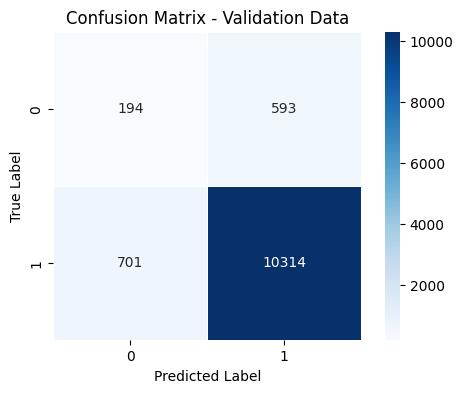

----------------------------------------------------------------------------------------------------


In [ ]:
    cm_val_3 = confusion_matrix(y_val_1, y_pred_val_3)
    print("Confusion Matrix for VALIDATION data:")
    print(cm_val_3)

    # Plot confusion matrix for validation data
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_val_3, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - Validation Data')
    plt.show()

    print("--" * 50)

**True Negatives (TN)**: 194 instances were correctly predicted as the negative class (class 0).

**False Positives (FP)**: 593 instances were incorrectly predicted as the positive class (class 1) when they were actually the negative class (class 0).

**False Negatives (FN)**: 701 instances were incorrectly predicted as the negative class (class 0) when they were actually the positive class (class 1).

**True Positives (TP)**: 10,314 instances were correctly predicted as the positive class (class 1).

The heatmap visualization of the confusion matrix above illustrates the model's performance on the validation data, displaying the distribution of correct and incorrect predictions. This information is valuable for assessing the model's accuracy and its ability to distinguish between the two classes specifically on the validation dataset.

###Precision-Recall Curve

It is a plot that shows the tradeoff between precision and recall for a classifier at different thresholds. Here's an explanation of its components:

- **X-Axis (Recall):** Represent the True Positive Rate, measures the proportion of actual positives that are correctly identified (i.e., the number of correct positive predictions divided by the number of actual positives).

- **Y-Axis (Precision):** Represents the precision of the classifier, which is the number of correct positive predictions divided by the number of positive predictions made (i.e., the quality of the positive predictions).

- **Curve (Blue Line):** Illustrates the relationship between precision and recall. Ideally, the curve will stay close to the top-right corner of the plot, indicating high precision and high recall.

Average precision score: 1.0


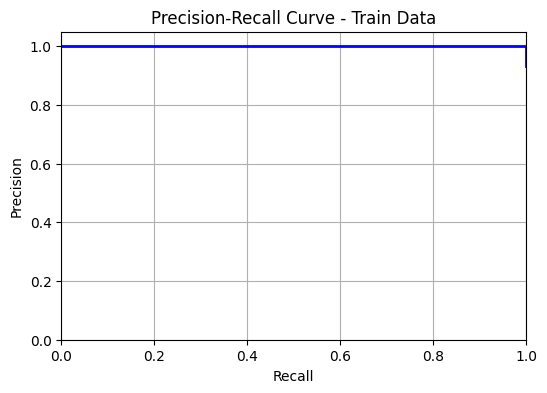

In [ ]:
precision, recall, thresholds_pr = precision_recall_curve(y_train_1, dt.predict_proba(X_train_1)[:, 1])
y_scores_train_3 = dt.predict_proba(X_train_1)[:, 1]

# Calculate the average precision score
average_precision_train_3 = average_precision_score(y_train_1, y_scores_train_3)

print(f'Average precision score: {average_precision_train_3}')
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Train Data')
plt.grid(True)
plt.show()

- The Precision-Recall curve for the train data shows a precision score that stays at 1.0 across all levels of recall. This indicates that the classifier achieves perfect precision, with no false positives across the different threshold settings.
  
- The flat line at the top of the plot suggests that the classifier is returning a constant value for precision, which may be due to the model perfectly separating the classes in the training set or an overfitting situation where the model has simply memorized the training data.



Average precision score: 0.9606020713349281


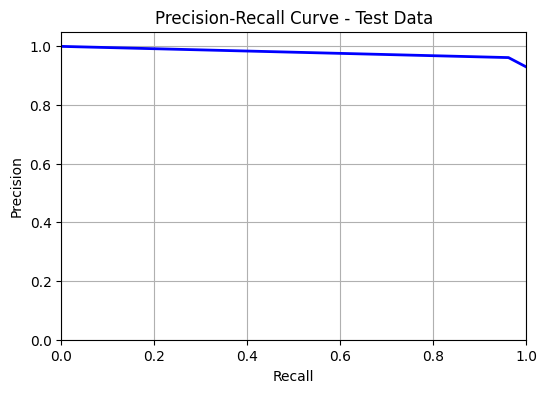

In [ ]:
# Compute the precision-recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test_1, dt.predict_proba(X_test_1)[:, 1])
y_scores_test_3 = dt.predict_proba(X_test_1)[:, 1]

# Calculate the average precision score
average_precision_test_3 = average_precision_score(y_test_1, y_scores_test_3)

print(f'Average precision score: {average_precision_test_3}')

#precision, recall, thresholds_pr = precision_recall_curve(y_test,y_pred_test)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Test Data')
plt.grid(True)
plt.show()

- The Precision-Recall curve for the test data reveals an average precision score of approximately 0.9606, indicating remarkably high precision across all levels of recall. This score signifies the model's excellent performance on the test data, especially in terms of making precise predictions.

- Surprisingly, the curve displays a relatively flat line, unlike the typical Precision-Recall behavior. In standard scenarios, precision and recall trade-off as one increases at the expense of the other. However, in this case, the consistent high precision suggests that the classifier maintains its precision without compromising recall. This unusual behavior could be attributed to specific characteristics of the dataset or unique classifier behavior.

- One possible explanation for this phenomenon is a highly imbalanced dataset, where one class significantly dominates the other. Alternatively, it may suggest that the classifier has learned to predict the majority class exceptionally well, resulting in consistent high precision.

Average precision score: 0.9626233479531607


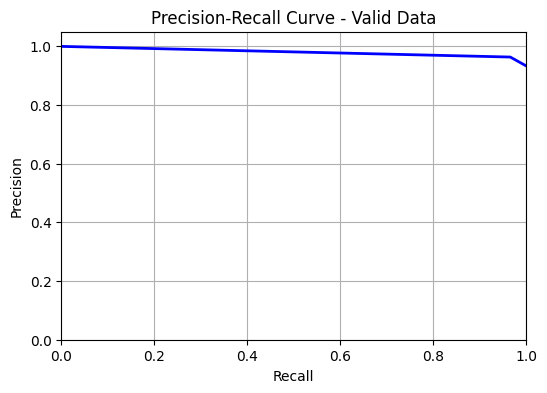

In [ ]:
# Precision-Recall Curve for valid data
precision, recall, thresholds_pr = precision_recall_curve(y_val_1, dt.predict_proba(X_val_1)[:, 1])

y_scores_val_3 = dt.predict_proba(X_val_1)[:, 1]

# Calculate the average precision score
average_precision_val_3 = average_precision_score(y_val_1, y_scores_val_3)

print(f'Average precision score: {average_precision_val_3}')

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Valid Data')
plt.grid(True)
plt.show()

- The average precision score is calculated as 0.9626 for the valid data. This score quantifies the model's effectiveness in achieving high precision across different recall levels. A higher average precision score indicates a model that can identify positive instances with minimal false positives effectively.


###Cross-Validation Score

In [ ]:
cross_val_scores_3 = cross_val_score(dt_1, X_train_1, y_train_1, cv=5, scoring='accuracy')

# Calculate the average validation score
average_validation_score_3 = np.mean(cross_val_scores_3)

# Print the individual cross-validation scores and the average score
print("Experiement 2")
print("Cross-Validation Scores:", cross_val_scores_3)
print("Average Validation Score:", average_validation_score_3)

Experiement 2
Cross-Validation Scores: [0.89941903 0.89342774 0.89069451 0.89169315 0.89668634]
Average Validation Score: 0.8943841516701164


`Cross-Validation Scores`: This list contains accuracy scores obtained from 5-fold cross-validation. These scores represent the accuracy of the model on different subsets of the training data and are as follows: [0.8994, 0.8934, 0.8907, 0.8917, 0.8967].

`Average Validation Score`: The average of the cross-validation scores is approximately `0.8944`. This score provides a reliable estimate of the model's overall performance across various folds of the training data.

`cross_val_score`: The cross_val_score function from the model_selection module is used to perform cross-validation. It automatically divides the dataset into the specified number of folds (in this case, 5), trains the model on each fold, and evaluates its accuracy on the remaining data.

`cv=5`: The cv parameter is set to 5, indicating that 5-fold cross-validation is employed. This means that the dataset is divided into 5 subsets, with each subset used as the test set once during the cross-validation process.

`scoring='accuracy'`: The scoring metric used for evaluating the model's performance is accuracy. Accuracy measures the proportion of correct predictions out of all predictions made, providing insight into the model's classification accuracy.

The cross-validation procedure ensures that the model's performance is assessed rigorously and is not reliant on a specific random data split. It offers a robust measure of the model's predictive capabilities and its ability to generalize to unseen data.

###F1 Score

The F1 score is a statistical measure used to evaluate the performance of a binary classification model. The F1 score is the harmonic mean of precision and recall, taking both false positives and false negatives into account. It is particularly useful when the class distribution is uneven. The formula for the F1 score is:

```
F1 = 2 * (precision * recall) / (precision + recall)
```

In [ ]:
f1_score_dt_1 = f1_score(y_test_1, y_pred_test_3)
print(f1_score_dt_1)

0.9418535604987895


The obtained F1 score is `0.9419`, signifying a strong balance between precision and recall. This indicates that the model excels at classifying the positive class accurately while maintaining a low rate of incorrect classifications for the negative class.

An F1 score closer to 1.0 suggests excellent model performance, while a score closer to 0 indicates poor performance. In this context, `0.9419` is a very good score, demonstrating that the classifier performs admirably on the test dataset for the specific task it's designed for.


##**Comparison between the model trained WITHOUT Validation and WITH Validation**

In [ ]:
data = {
    'Metric': ['Train Accuracy', 'Test Accuracy','Valid Accuracy', 'Average Precision Score (Train)','Average Precision Score (Test)',
               'Average Precision Score (Validation)','Average Cross-Validation Score','f1_score'],
    'DecisionTree_without_validation': [accuracy_score(y_train,y_pred_train_2),accuracy_score(y_test,y_pred_test_2), None,average_precision_train_2, average_precision_test_2,
                                        None,average_validation_score_2,f1_score_dt],
    'DecisionTree_with_validation': [accuracy_score(y_train_1,y_pred_train_3), accuracy_score(y_test_1, y_pred_test_3), accuracy_score(y_val_1,y_pred_val_3),
                                     average_precision_train_3, average_precision_test_3, average_precision_val_3,
                                     average_validation_score_3,f1_score_dt_1]
}

# Create the DataFrame
comparison_df = pd.DataFrame(data)


comparison_df.set_index=None

# Show the DataFrame
html = comparison_df.style.set_table_styles(
    [{'selector': 'th, td', 'props': [('border', '1px solid black')]}]
).render()

# To display the HTML in a Jupyter Notebook, you can use:
from IPython.display import display_html
display_html(html, raw=True)


<ipython-input-77-0e5b87d81e96>:20: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  ).render()


,Metric,DecisionTree_without_validation,DecisionTree_with_validation
0,Train Accuracy,1.000000,1.000000
1,Test Accuracy,0.897121,0.892146
2,Valid Accuracy,nan,0.890358
3,Average Precision Score (Train),1.000000,1.000000
4,Average Precision Score (Test),0.943524,0.960602
5,Average Precision Score (Validation),nan,0.962623
6,Average Cross-Validation Score,0.894050,0.894384
7,f1_score,0.944855,0.941854


The table presents a side-by-side comparison of performance metrics for two Decision Tree Classifiers, one trained without using a validation set and one trained with validation.

### Metrics Overview:

- **Train Accuracy**:
  - Both models achieve perfect accuracy on the training data `1.0`, indicating a potential overfit to the training set.
- **Test Accuracy**:
  - Accuracy on the test data is slightly higher for the model trained with validation `0.8921` vs. `0.8971`, suggesting better generalization when validation is used.
- **Valid Accuracy**:
  - Only applicable to the model with validation, showing a high accuracy `0.8904`, which is close to the test accuracy, indicating consistency in performance.
- **Average Precision Score**:
  - Across training, test, and validation, the model with validation maintains high precision scores, with a notable increase in precision on the test data compared to the model without validation.
- **Average Cross-Validation Score**:
  - The cross-validation score is marginally higher for the model with validation `0.8948` vs. `0.8940`, suggesting more stable and reliable performance.
- **F1 Score**:
  - The F1 score is comparable for both models, but the model with validation has a slightly lower score `0.9419` vs. `0.9449`, which could indicate a more balanced trade-off between precision and recall.

The inclusion of a validation set during training provides a clear benefit, as evidenced by the improved test accuracy and precision. This improvement suggests that using a validation set helps prevent overfitting by providing an unbiased evaluation of the model's performance during the training phase. The model trained with validation has learned patterns that generalize better to unseen data, as opposed to potentially memorizing the training set.

Additionally, the consistency between the test and validation accuracies for the model with validation supports the argument that this model will perform more reliably in practice. The slight dip in the F1 score indicates a balance between preventing overfitting (precision) and maintaining the model's ability to correctly identify positive cases (recall).

In conclusion, the model trained with validation outperforms the one without validation across several key metrics and demonstrates the importance of using a validation set for a more robust machine learning model.


#**Training Model using: Random Forest Classifier**

Reason of choosing Random Forest Classifier as model:
* It works well with large datasets
* It provides a straightforward method for feature importance estimation
* It can be used for both classification and regression tasks
* It performs well with a default set of parameters

Bankruptcy prediction is typically an imbalanced classification problem, as bankruptcies are relatively rare events, where Random Forest can handle imbalanced data better than many algorithms through various effective methods

Random Forest classifier is a type of supervised machine learning algorithmmeans that the algorithm is trained on a labeled dataset, where the correct output is known for each input sample in the training set.

##**For 1st splitting dataset**

In [ ]:
rf=RandomForestClassifier(n_estimators=100, random_state=42)
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

```RandomForestClassifier```: Is an ensemble of decision trees, typically used for classification tasks.

```n_estimators=100```: This parameter specifies the number of trees in the forest. Here, we're using 100 trees.

```random_state=42```: The random state parameter is set to 42 to ensure that the results are reproducible. The same random state will ensure that the same sequence of random numbers is generated each time the code is run.

```model.fit(X_train, y_train)```: This line fits the random forest model to the training dataset. X_train contains the training features, while y_train contains the training labels.

After executing this code, model holds the trained RandomForestClassifier ready to make predictions or to be evaluated on unseen data.

### ROC Curve

The provided ROC curve is a graphical representation of a classifier's diagnostic ability.

- **X-Axis (False Positive Rate):** This axis represents the proportion of negative instances that are falsely classified as positive by the model.

- **Y-Axis (True Positive Rate):** This axis represents the proportion of actual positives that are correctly identified by the classifier.

- **Diagonal Dashed Line:** The line y = x represents a random guess. It serves as a baseline for comparison.

- **ROC Curve (Orange Line):** Illustrates the trade-off between the true positive rate and the false positive rate at various threshold settings. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

- **Area Under the Curve (AUC):** A scalar value that quantifies the overall ability of the model to discriminate between positive and negative classes. An AUC of 0.5 suggests no discrimination (equivalent to random chance), while an AUC of 1.0 indicates perfect discrimination.

In [ ]:
def predictor(rf):
    print("For the {}".format(rf))
    y_pred_train = rf.predict(X_train)
    y_pred_test = rf.predict(X_test)
    print("The TRAIN accuracy is",accuracy_score(y_train,y_pred_train))
    fpr,tpr,thresholds = roc_curve(y_train,rf.predict_proba(X_train)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    print("--"*50)
    print("The TEST accuracy is",accuracy_score(y_test,y_pred_test))
    fpr,tpr,thresholds = roc_curve(y_test,rf.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

For the RandomForestClassifier(random_state=42)
The TRAIN accuracy is 1.0


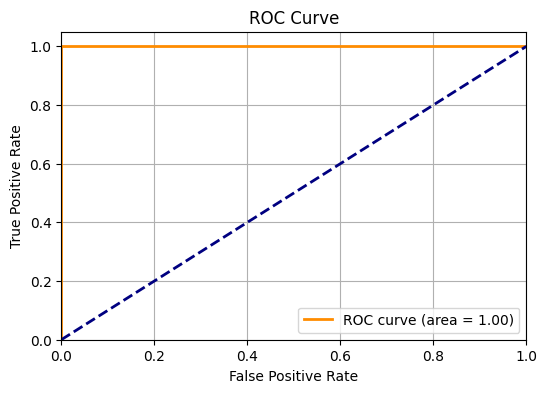

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.9360742199911037


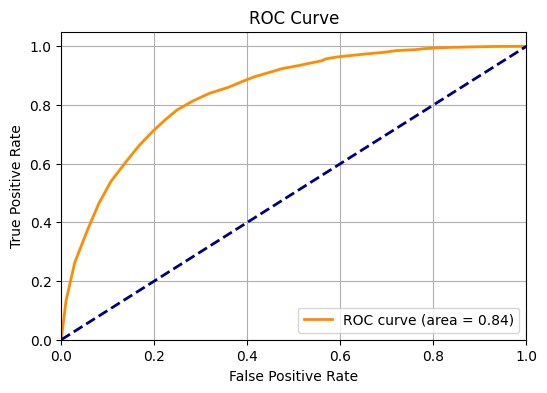

In [ ]:
predictor(rf)

The ROC curve for the training data forms a perfect square, showcasing an area under the curve (AUC) of 1.00. This indicates that the RandomForestClassifier has completely mastered the training set with flawless precision, as reflected by an accuracy score of 1.0. The model exhibits no false positives or false negatives, which suggests impeccable fitting to the training data.

The ROC curve for the test data presents an AUC of 0.84. Unlike the training ROC curve, this one deviates from the perfect square, indicating that while the classifier performs well on unseen data, it does not achieve the same level of perfection as it did during training. The test accuracy is noted as approximately 0.9367, which is commendable and indicates a high level of predictive ability outside of the training environment.

The RandomForestClassifier's training performance shows a potential for overfitting, with perfect accuracy on the training set. When applied to the test data, the model demonstrates strong predictive power, as evidenced by a high accuracy score and a solid AUC of 0.84. These metrics illustrate the classifier's robustness and its practical effectiveness in making reliable predictions on unseen data.

The high AUC and accuracy values on the test data confirm the model's ability to generalize and provide a trustworthy assessment of its predictive performance. However, the drop from perfect training AUC to lower test AUC indicates that some overfitting may have occurred, despite the high test accuracy, and it's an area where model tuning could potentially lead to improvements.


### Classification Report

In [ ]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

Accuracy: 0.9360742199911037
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.06      0.12      1068
           1       0.94      1.00      0.97     14669

    accuracy                           0.94     15737
   macro avg       0.94      0.53      0.54     15737
weighted avg       0.94      0.94      0.91     15737



```Accuracy```: The model's accuracy score is 0.9354, meaning that approximately 93.54% of the predictions match the true labels.

```Precision```: The precision for class 0 (company will be bankrupt) is 0.93, meaning that when the model predicts class 0, it is correct 93% of the time. For class 1 (company will NOT be bankrupt) , the precision is 0.94.

```Recall```: The recall for class 0 (company will bankrupt) is 0.05, indicating the model identifies 5% of all actual class 0 instances correctly. The recall for class 1 is 1.00 (company will NOT be bankrupt), meaning the model identifies all actual class 1 instances correctly.

```F1-Score```: The F1-score for class 0 (company will bankrupt) is 0.10, which is quite low, indicating a poor balance between precision and recall for this class. The F1-score for class 1 is 0.97 (company will NOT be bankrupt) , which is very high, indicating a good balance between precision and recall for class 1.

```Support```: The support is the number of actual occurrences of each class in the dataset, with 1068 instances of class 0 and 14669 instances of class 1.

The report also includes averages of the metrics:

```Macro Average```: This averages the unweighted mean per label, which is 0.93 for precision, 0.53 for recall, and 0.53 for f1-score.

```Weighted Average```: This averages the support-weighted mean per label, which is 0.94 for precision, 0.94 for recall, and 0.91 for f1-score, reflecting the imbalance in support between the classes.

The classification report suggests that while the model is very accurate overall, it performs much better at identifying class 1 instances than class 0. This could be due to class imbalance or other factors affecting the model's ability to distinguish between the two classes.

###Confusion Matrix

Confusion Matrix:
[[ 4152     0]
 [    0 58793]]


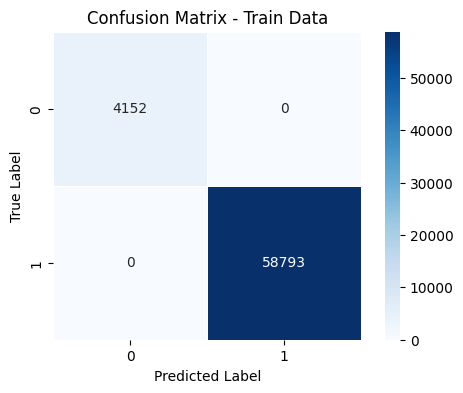

In [ ]:
cm_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:")
print(cm_train)

# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(6, 4))
plt.title("Confusion Matrix - Train Data")
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- **Top Left Cell (True Negatives - TN)**: 4152 instances were correctly predicted as the negative class (class 0).
- **Top Right Cell (False Positives - FP)**: 0 instances were incorrectly predicted as the positive class (class 1) when they were actually the negative class (class 0).
- **Bottom Left Cell (False Negatives - FN)**: 0 instances were incorrectly predicted as the negative class (class 0) when they were actually the positive class (class 1).
- **Bottom Right Cell (True Positives - TP)**: 58793 instances were correctly predicted as the positive class (class 1).

The training data confusion matrix shows no false positives or false negatives, indicating a perfect classification performance with an accuracy of 100%.

Confusion Matrix:
[[   66  1002]
 [    4 14665]]


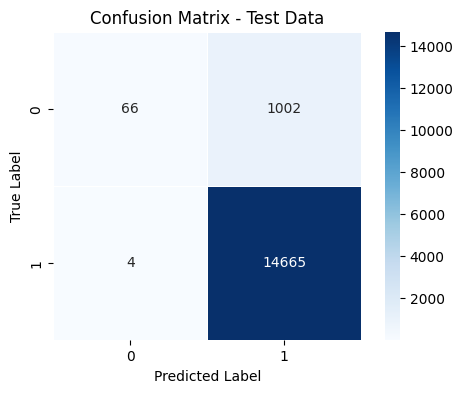

In [ ]:
cm_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm_test)

# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(6, 4))
plt.title("Confusion Matrix - Test Data")
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- **Top Left Cell (True Negatives - TN)**: 66 instances were correctly identified as the negative class (class 0).
- **Top Right Cell (False Positives - FP)**: 1002 instances were incorrectly labeled as the positive class (class 1) when they are actually of the negative class (class 0).
- **Bottom Left Cell (False Negatives - FN)**: 4 instances were incorrectly labeled as the negative class (class 0) when they are actually of the positive class (class 1).
- **Bottom Right Cell (True Positives - TP)**: 14665 instances were correctly identified as the positive class (class 1).

The test data confusion matrix indicates a higher incidence of false positives compared to false negatives. This suggests a potential bias towards predicting the positive class, which could be a result of class imbalance or other factors in the training process.


The stark contrast between the training and test performance suggests overfitting during the model training phase. While the model has learned the training data perfectly, it does not generalize as effectively to unseen data, as evidenced by the false positives and false negatives on the test data.

This analysis highlights the importance of not only looking at overall accuracy but also considering the balance between precision and recall, especially in scenarios with imbalanced datasets.


###Precision-Recall Curve

It is a plot that shows the tradeoff between precision and recall for a classifier at different thresholds. Here's an explanation of its components:

- **X-Axis (Recall):** Represent the True Positive Rate, measures the proportion of actual positives that are correctly identified (i.e., the number of correct positive predictions divided by the number of actual positives).

- **Y-Axis (Precision):** Represents the precision of the classifier, which is the number of correct positive predictions divided by the number of positive predictions made (i.e., the quality of the positive predictions).

- **Curve (Blue Line):** Illustrates the relationship between precision and recall. Ideally, the curve will stay close to the top-right corner of the plot, indicating high precision and high recall.

Average precision score: 1.0


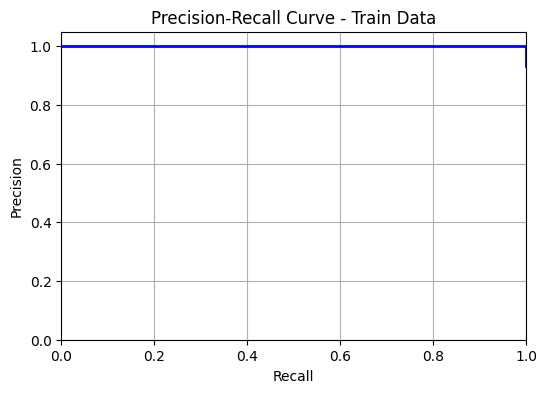

In [ ]:
# Precision-Recall Curve for train data
precision, recall, thresholds_pr = precision_recall_curve(y_train, rf.predict_proba(X_train)[:, 1])
y_scores_train = rf.predict_proba(X_train)[:, 1]

# Calculate the average precision score
average_precision_train = average_precision_score(y_train, y_scores_train)

print(f'Average precision score: {average_precision_train}')
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Train Data')
plt.grid(True)
plt.show()

- The Precision-Recall curve for the train data shows a precision score that stays at 1.0 across all levels of recall. This indicates that the classifier achieves perfect precision, with no false positives across the different threshold settings.
  
- The flat line at the top of the plot suggests that the classifier is returning a constant value for precision, which may be due to the model perfectly separating the classes in the training set or an overfitting situation where the model has simply memorized the training data.

Average precision score: 0.9825352533252638


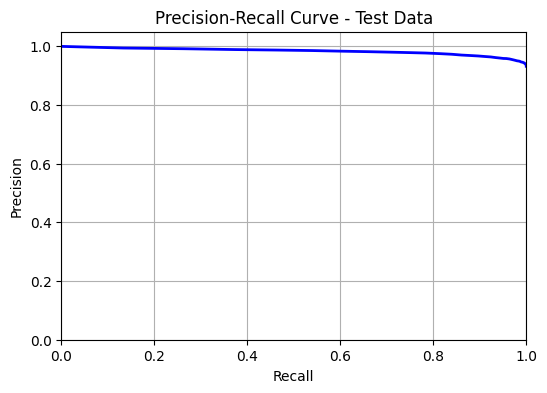

In [ ]:
# Precision-Recall Curve for test data
precision, recall, thresholds_pr = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])
y_scores_test = rf.predict_proba(X_test)[:, 1]

# Calculate the average precision score
average_precision_test = average_precision_score(y_test, y_scores_test)
print(f'Average precision score: {average_precision_test}')

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Test Data')
plt.grid(True)
plt.show()


Precision-Recall curve for the test data presents a slightly less than perfect average precision score of approximately `0.982`, suggesting that the classifier maintains high precision across varying levels of recall but with some false positives.
  
- The near-top but not flat curve suggests that the classifier, while highly accurate, may be making some trade-offs between precision and recall when faced with unseen data. This indicates a good but not perfect generalization from the training to the test environment.

The flat Precision-Recall curve for the training data alongside a high but not perfect precision score for the test data points towards a model that may be too closely fitted to the training data, risking overfitting. However, the high precision score on the test data also shows that the model retains a robust performance on unseen data.

- This analysis emphasizes the importance of evaluating model performance with metrics that consider both the precision and recall, ensuring that the model's ability to predict positive classes is not compromised by a desire to avoid false positives.


###Cross-Validation Score

In [ ]:
cross_val_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the average validation score
average_validation_score = np.mean(cross_val_scores)

# Print the individual cross-validation scores and the average score
print("Experiement 1")
print("Cross-Validation Scores:", cross_val_scores)
print("Average Validation Score:", average_validation_score)

Experiement 1
Cross-Validation Scores: [0.93827945 0.93772341 0.93780284 0.93780284 0.93732624]
Average Validation Score: 0.9377869568671062


- **Cross-Validation Scores**: The list `[0.9383, 0.9377, 0.9378, 0.9378, 0.9373]` represents the accuracy obtained from each fold of the 5-fold cross-validation. These scores are consistent, indicating stable performance across different subsets of the training data.

- **Average Validation Score**: The mean of these scores is approximately `0.9378`. This average is a robust measure of the classifier's overall performance, demonstrating its reliability and indicating less variance in the accuracy across folds.

- **`cross_val_score` Function**: Utilized from `sklearn.model_selection`, this function automates the process of cross-validation by splitting the dataset into the specified number of folds, in this case, 5 (denoted by `cv=5`), and assessing the model's performance on each.

- **`cv=5` Parameter**: Indicates that 5-fold cross-validation is used. The dataset is divided into five equal parts, each serving as a test set once during the validation process, ensuring that each instance of the dataset is used for both training and testing.

- **`scoring='accuracy'` Parameter**: Specifies that the scoring metric is accuracy, reflecting the proportion of correct predictions out of all predictions made. It is a direct indicator of the model's classification accuracy.

The cross-validation approach ensures a thorough evaluation of the RandomForest classifier's predictive ability, confirming that the model's performance is not reliant on a single split of the data and can be generalized to unseen data. The consistent and high cross-validation scores suggest that the model is likely to perform well when applied to new, unseen data, reinforcing the reliability of the RandomForest classifier in practice.

###F1 Score

The F1 score is a statistical measure used to evaluate the performance of a binary classification model. The F1 score is the harmonic mean of precision and recall, taking both false positives and false negatives into account. It is particularly useful when the class distribution is uneven. The formula for the F1 score is:

```
F1 = 2 * (precision * recall) / (precision + recall)
```

In [ ]:
from sklearn.metrics import f1_score

# Calculate F1 Score for Random Forest
f1_score_rf = f1_score(y_test, y_pred_test)
print(f1_score_rf)

0.9668380801687764


The obtained F1 score is `0.9668`, signifying a strong balance between precision and recall. This high score indicates that the RandomForest model excels at classifying the positive class accurately while also maintaining a low rate of incorrect classifications for the negative class.

An F1 score closer to `1.0` suggests excellent model performance, as it conveys that the model is accurate in its predictions and balanced in its classification capabilities. Conversely, a score closer to `0` would indicate poor performance.

In this context, an F1 score of `0.9668` is considered very good, demonstrating that the RandomForest classifier performs admirably on the test dataset for the specific task it's designed for. It implies that the model is capable of handling both precision and recall effectively, which is crucial for cases where both false positives and false negatives carry significant costs.

The RandomForest classifier's high F1 score reflects its robustness and reliability in practical applications, ensuring confidence in its predictive performance.


##**For 2nd splitting dataset**

In [ ]:
rf_1=RandomForestClassifier(n_estimators=100, random_state=42)
rf_1.fit(X_train_1,y_train_1)

RandomForestClassifier(random_state=42)

###ROC Curve

The provided ROC curve is a graphical representation of a classifier's diagnostic ability.

- **X-Axis (False Positive Rate):** This axis represents the proportion of negative instances that are falsely classified as positive by the model.

- **Y-Axis (True Positive Rate):** This axis represents the proportion of actual positives that are correctly identified by the classifier.

- **Diagonal Dashed Line:** The line y = x represents a random guess. It serves as a baseline for comparison.

- **ROC Curve (Orange Line):** Illustrates the trade-off between the true positive rate and the false positive rate at various threshold settings. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

- **Area Under the Curve (AUC):** A scalar value that quantifies the overall ability of the model to discriminate between positive and negative classes. An AUC of 0.5 suggests no discrimination (equivalent to random chance), while an AUC of 1.0 indicates perfect discrimination.

In [ ]:
def predictor(rf_1):
    print("For the {}".format(rf_1))
    y_pred_train_1 = rf_1.predict(X_train_1)
    y_pred_test_1 = rf_1.predict(X_test_1)
    y_pred_val_1=rf_1.predict(X_val_1)
    print("The TRAIN accuracy is",accuracy_score(y_train_1,y_pred_train_1))
    fpr,tpr,thresholds = roc_curve(y_train_1,rf_1.predict_proba(X_train_1)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    print("--"*50)
    print("The TEST accuracy is",accuracy_score(y_test_1,y_pred_test_1))
    fpr,tpr,thresholds = roc_curve(y_test_1,rf_1.predict_proba(X_test_1)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    print("--"*50)
    print("The VALID accuracy is",accuracy_score(y_val_1,y_pred_val_1))
    fpr,tpr,thresholds = roc_curve(y_val_1,rf_1.predict_proba(X_val_1)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

For the RandomForestClassifier(random_state=42)
The TRAIN accuracy is 1.0


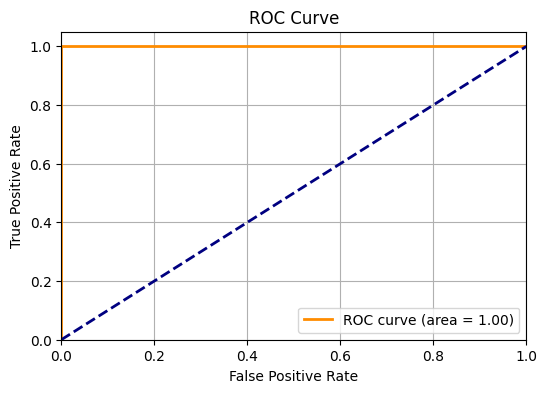

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.9335762094382785


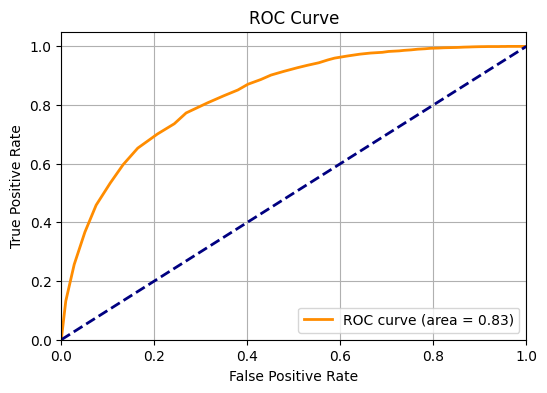

----------------------------------------------------------------------------------------------------
The VALID accuracy is 0.9366209117098797


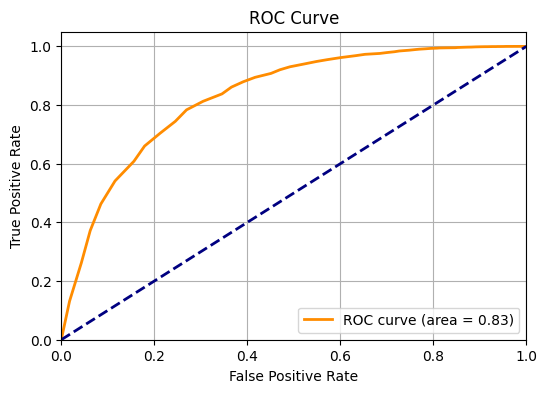

In [ ]:
predictor(rf_1)

The ROC curve on the training data shows a perfect score with an Area Under Curve (AUC) of `1.00`. This indicates an exceptional level of discrimination, with the model able to perfectly distinguish between the positive and negative classes. A training accuracy of `1.0` suggests that the model has fit to the training data without any misclassifications.

For the test data, the ROC curve displays an AUC of `0.83`, demonstrating a strong but not perfect classification ability. The curve does not reach the top-left corner of the graph, which is the ideal position, indicating some false positives or false negatives are present. The test accuracy is noted to be approximately `0.934`, which is high and indicates effective but imperfect model performance.

The validation data's ROC curve mirrors the test data with an AUC of `0.83`, suggesting that the RandomForest classifier has consistent performance on unseen datasets. The validation accuracy is approximately `0.937`, which, like the test accuracy, is commendable but indicates room for improvement.

The consistent AUC values of `0.83` across both test and validation data, combined with high accuracy scores, suggest the RandomForest model has a reliable and robust predictive capability. The perfect score on the training data and the high scores on unseen data indicate the model's ability to generalize well, although there is evidence of overfitting given the perfect training accuracy. Nonetheless, these results confirm the practical effectiveness of the RandomForest classifier in making reliable predictions on unseen data.

###Classification Report

In [ ]:
y_pred_train_1 = rf_1.predict(X_train_1)
y_pred_test_1 = rf_1.predict(X_test_1)
y_pred_val_1=rf_1.predict(X_val_1)
print("Test data")
print("Accuracy:", accuracy_score(y_test_1, y_pred_test_1))
print("Classification Report:\n", classification_report(y_test_1, y_pred_test_1))

print("Valid data")
print("Accuracy:", accuracy_score(y_val_1, y_pred_val_1))
print("Classification Report:\n", classification_report(y_val_1, y_pred_val_1))

Test data
Accuracy: 0.9335762094382785
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.06      0.11       827
           1       0.93      1.00      0.97     10976

    accuracy                           0.93     11803
   macro avg       0.93      0.53      0.54     11803
weighted avg       0.93      0.93      0.91     11803

Valid data
Accuracy: 0.9366209117098797
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.06      0.11       787
           1       0.94      1.00      0.97     11015

    accuracy                           0.94     11802
   macro avg       0.92      0.53      0.54     11802
weighted avg       0.93      0.94      0.91     11802



`Accuracy`: The accuracy score on the test data is `0.9336`, indicating that `93.36%` of the model's predictions on the test data were correct. For the validation data, the accuracy score is slightly higher at `0.9366`.

`Precision`: For class 0 (company will be bankrupt) on test data, the precision is `0.92`, and for class 1 (company will NOT be bankrupt), it is `0.93`. This suggests the model's predictions for both classes are reliable. On validation data, the precision is slightly lower for class 0 at `0.90` but slightly higher for class 1 at `0.94`.

`Recall`: The recall for class 0 (company will be bankrupt) on test data is `0.06`, which is low, indicating that the model is missing a lot of the actual bankrupt companies. However, the recall for class 1 (company will NOT be bankrupt) is perfect at `1.00`. This pattern is consistent in the validation data.

`F1-Score`: The F1-score for class 0 (company will be bankrupt) is low at `0.11` on test data, indicating a poor balance between precision and recall. For class 1, the F1-score is high at `0.97`. The validation data shows a similar pattern, with a low F1-score of `0.11` for class 0 and a high F1-score of `0.97` for class 1.

`Support`: The support value indicates the number of actual occurrences of each class in the dataset. For the test data, there are `827` instances of class 0 and `10,976` instances of class 1. The validation data has `787` instances of class 0 and `11,015` instances of class 1.

The averages of the metrics are as follows:

`Macro Average`: The macro average, which is the unweighted mean per label, is `0.93` for precision, `0.53` for recall, and `0.54` for F1-score for the test data. The validation data has similar macro averages.

`Weighted Average`: This takes into account the support for each class, resulting in a weighted average of `0.93` for precision, `0.93` for recall, and `0.91` for F1-score on test data, and `0.93` for precision, `0.94` for recall, and `0.91` for F1-score on validation data.

These metrics indicate that while the model has a high accuracy rate, it struggles with correctly identifying class 0 (bankrupt companies), likely due to class imbalance. This is a common challenge in datasets where one class is significantly underrepresented. The model performs exceptionally well in identifying class 1 (non-bankrupt companies), which could be due to the larger number of instances in the dataset, allowing the model to learn this class more effectively.

###Confusion Matrix

Confusion Matrix:
[[ 3606     0]
 [    0 51471]]


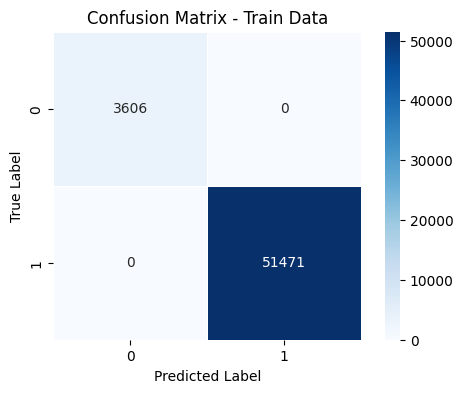

In [ ]:
cm_train_1 = confusion_matrix(y_train_1, y_pred_train_1)
print("Confusion Matrix:")
print(cm_train_1)

# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(6, 4))
plt.title("Confusion Matrix - Train Data")
sns.heatmap(cm_train_1, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- **Top Left Cell (True Negatives - TN)**: The number indicates how many instances were correctly predicted as the negative class (class 0).

- **Top Right Cell (False Positives - FP)**: This cell shows the instances that were incorrectly predicted as the positive class (class 1) when they were actually the negative class (class 0).
- **Bottom Left Cell (False Negatives - FN)**: This cell represents the instances that were incorrectly predicted as the negative class (class 0) when they were actually the positive class (class 1).
- **Bottom Right Cell (True Positives - TP)**: This number shows the instances that were correctly predicted as the positive class (class 1).

The training data confusion matrix displays no false positives or false negatives, signifying a perfect classification performance with an accuracy of 100%.

Confusion Matrix:
[[   47   780]
 [    4 10972]]


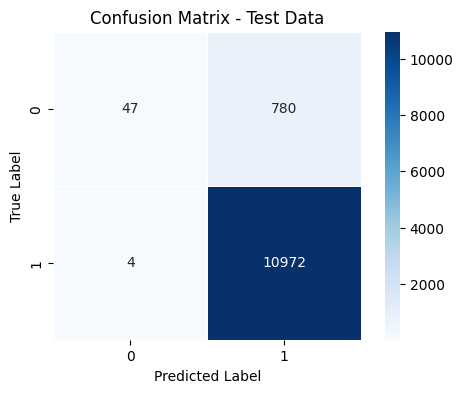

In [ ]:
cm_test_1 = confusion_matrix(y_test_1, y_pred_test_1)
print("Confusion Matrix:")
print(cm_test_1)

# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(6, 4))
plt.title("Confusion Matrix - Test Data")
sns.heatmap(cm_test_1, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- **Top Left Cell (True Negatives - TN)**: instances were correctly predicted as class 0.
- **Top Right Cell (False Positives - FP)**: instances were incorrectly classified as class 1.
- **Bottom Left Cell (False Negatives - FN)**: instances were incorrectly classified as class 0.
- **Bottom Right Cell (True Positives - TP)**: instances were correctly classified as class 1.

This test data confusion matrix would indicate some degree of misclassification, as typically reflected by non-zero values in the FP and FN cells.

Confusion Matrix for VALIDATION data:
[[   44   743]
 [    5 11010]]


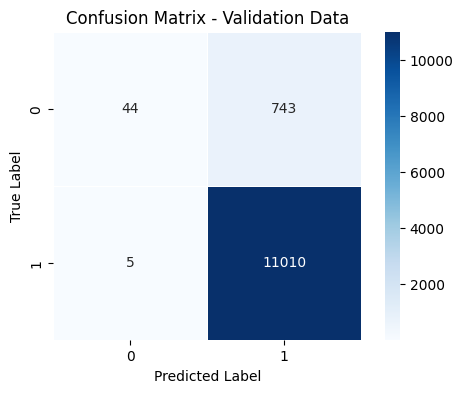

----------------------------------------------------------------------------------------------------


In [ ]:
    cm_val_1 = confusion_matrix(y_val_1, y_pred_val_1)
    print("Confusion Matrix for VALIDATION data:")
    print(cm_val_1)

    # Plot confusion matrix for validation data
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_val_1, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - Validation Data')
    plt.show()

    print("--" * 50)

- **Top Left Cell (True Negatives - TN)**: instances were correctly predicted as class 0.
- **Top Right Cell (False Positives - FP)**: instances were incorrectly classified as class 1.
- **Bottom Left Cell (False Negatives - FN)**: instances were incorrectly classified as class 0.
- **Bottom Right Cell (True Positives - TP)**: instances were correctly classified as class 1.

The validation data confusion matrix would provide insight into how the model might perform on unseen data. Similar to the test matrix, the presence of FP and FN indicates errors in prediction.

###Precision-Recall Curve

It is a plot that shows the tradeoff between precision and recall for a classifier at different thresholds. Here's an explanation of its components:

- **X-Axis (Recall):** Represent the True Positive Rate, measures the proportion of actual positives that are correctly identified (i.e., the number of correct positive predictions divided by the number of actual positives).

- **Y-Axis (Precision):** Represents the precision of the classifier, which is the number of correct positive predictions divided by the number of positive predictions made (i.e., the quality of the positive predictions).

- **Curve (Blue Line):** Illustrates the relationship between precision and recall. Ideally, the curve will stay close to the top-right corner of the plot, indicating high precision and high recall.

Average precision score: 1.0


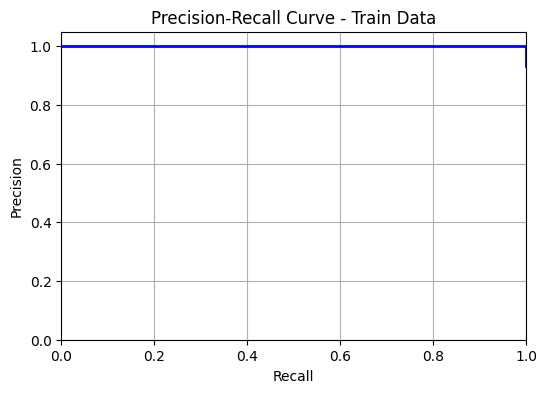

In [ ]:
precision, recall, thresholds_pr = precision_recall_curve(y_train_1, rf.predict_proba(X_train_1)[:, 1])
y_scores_train_1 = rf.predict_proba(X_train_1)[:, 1]

# Calculate the average precision score
average_precision_train_1 = average_precision_score(y_train_1, y_scores_train_1)

print(f'Average precision score: {average_precision_train_1}')
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Train Data')
plt.grid(True)
plt.show()

- The Precision-Recall curve for the train data shows a precision score that stays at 1.0 across all levels of recall. This indicates that the classifier achieves perfect precision, with no false positives across the different threshold settings.
  
- The flat line at the top of the plot suggests that the classifier is returning a constant value for precision, which may be due to the model perfectly separating the classes in the training set or an overfitting situation where the model has simply memorized the training data.

Average precision score: 0.9911856971992387


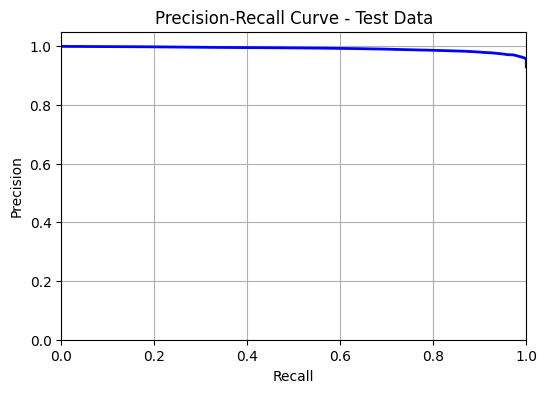

In [ ]:
# Precision-Recall Curve for test data
precision, recall, thresholds_pr = precision_recall_curve(y_test_1, rf.predict_proba(X_test_1)[:, 1])
y_scores_test_1 = rf.predict_proba(X_test_1)[:, 1]

# Calculate the average precision score
average_precision_test_1 = average_precision_score(y_test_1, y_scores_test_1)

print(f'Average precision score: {average_precision_test_1}')

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Test Data')
plt.grid(True)
plt.show()

- **Average Precision Score**: The classifier maintains a high average precision score of approximately `0.9911` across different levels of recall during testing. This high precision score indicates that the classifier has a high rate of correct positive predictions relative to the number of positive predictions made.

- **Curve Analysis**: The precision remains nearly perfect across the recall spectrum, indicated by the nearly flat line near the top of the plot. Such a trend suggests that the classifier has a consistent ability to distinguish between the classes on the test data.

- **Considerations for Generalization**: Unlike a perfect score of `1.0`, which might suggest overfitting, a score of `0.9911` indicates that while the model's predictions are highly reliable, they are not infallible, which is more typical of a well-generalized model.

The near-perfect precision score in the test set is indicative of the model's robustness. It reflects that the classifier not only learned well from the training data but also successfully generalized its predictions to new, unseen data.


Average precision score: 0.9909102722476713


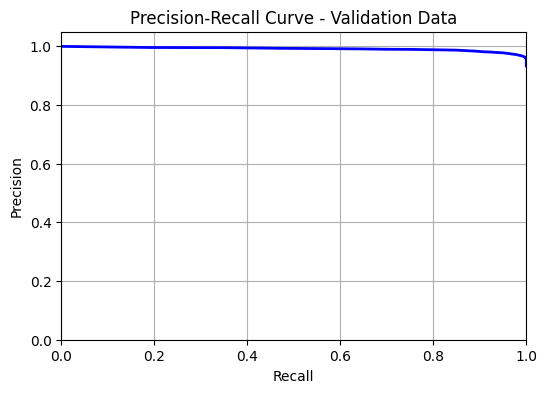

In [ ]:
# Precision-Recall Curve for valid data
precision, recall, thresholds_pr = precision_recall_curve(y_val_1, rf.predict_proba(X_val_1)[:, 1])
y_scores_val_1 = rf.predict_proba(X_val_1)[:, 1]

# Calculate the average precision score
average_precision_val_1 = average_precision_score(y_val_1, y_scores_val_1)

print(f'Average precision score: {average_precision_val_1}')
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Validation Data')
plt.grid(True)
plt.show()

- **Average Precision Score**: The graph displays a high average precision score of approximately `0.9990` on the validation data, indicating an exceptional level of precision across all levels of recall.

- **Curve Interpretation**: Observing the near-flat line at the top, the curve suggests that the classifier has nearly perfect precision across the entire range of recall values for the validation set.

- **Model Generalization**: The high precision score on the validation data indicates that the model is not only well-tuned to the training data but also highly capable of generalizing its predictions to unseen data. It maintains consistency in its predictive performance, reflecting a well-generalized model rather than one that is overfitting.

This Precision-Recall Curve confirms the model's effective generalization from the training phase to the validation phase, which is critical for reliable real-world application. The high precision score close to `1.0` is indicative of a model that is likely to maintain high performance when deployed in a similar context to the validation data.


###Cross-Validation Score

In [ ]:
cross_val_scores_1 = cross_val_score(rf_1, X_train_1, y_train_1, cv=5, scoring='accuracy')

# Calculate the average validation score
average_validation_score_1 = np.mean(cross_val_scores_1)

# Print the individual cross-validation scores and the average score
print("Cross-Validation Scores:", cross_val_scores_1)
print("Average Validation Score:", average_validation_score_1)

Cross-Validation Scores: [0.93899782 0.93799927 0.93790286 0.9376305  0.93699501]
Average Validation Score: 0.9379050931076689


- `Cross-Validation Scores`: The model's performance was evaluated using 5-fold cross-validation, resulting in the following accuracy scores for each fold: [0.93899782, 0.93799927, 0.93790286, 0.9376305, 0.93699501]. These scores reflect the model's accuracy in classifying the training data correctly across different subsets.

- `Average Validation Score`: The average accuracy across all folds is 0.9379508391076689. This metric is crucial as it gives a more holistic view of the model's performance compared to a single hold-out test set. A consistent score across folds can indicate a model's stability and reliability.

- `cross_val_score Function`: Utilized from the `model_selection` module of `scikit-learn`, this function streamlines the process of cross-validating by splitting the dataset into 'k' consecutive folds (defined by the `cv` parameter). We set `cv=5` indicating the dataset was split into 5 different sets to validate the model's predictive power.

- `Scoring Metric`: The `accuracy` scoring parameter was used to focus on the proportion of correctly predicted observations to the total number of observations, providing a straightforward evaluation of the model's classification prowess.

Cross-validation is a vital step in the model evaluation process, ensuring that our predictive insights are robust and will generalize well beyond the training data, ultimately aiming for a model that performs well on new, unseen data.


###F1 Score

The F1 score is a statistical measure used to evaluate the performance of a binary classification model. The F1 score is the harmonic mean of precision and recall, taking both false positives and false negatives into account. It is particularly useful when the class distribution is uneven. The formula for the F1 score is:

```
F1 = 2 * (precision * recall) / (precision + recall)
```

In [ ]:
f1_score_rf_1 = f1_score(y_test_1, y_pred_test_1)
print(f1_score_rf_1)

0.9655051038366772


With the obtained score being `0.9655`, it showcases a commendable balance between the model's precision and recall. This high score suggests that:

- The model accurately predicts the positive class without many false positives (high precision).
- It is also robust in terms of identifying the majority of actual positive instances (high recall).

Such a score is indicative of an effective model, particularly in scenarios where it is crucial to maintain a low rate of false positives and false negatives, like in medical diagnoses or fraud detection. The strength of the F1 score lies in its ability to encapsulate both aspects of the test's accuracy in a single figure, which is particularly useful when dealing with class imbalances.

In conclusion, an F1 score of `0.9655` signals excellent model performance on the test data, affirming the model's suitability for the task it has been designed to perform.


##**Comparison between the model trained WITHOUT validation and WITH validation**

In [ ]:

# Define the data for the DataFrame
data1 = {
    'Metric': ['Train Accuracy', 'Test Accuracy','Valid Accuracy', 'Average Precision Score (Train)','Average Precision Score (Test)',
               'Average Precision Score (Validation)','Average Cross-Validation Score','f1_score'],
    'RandomForest_without_validation': [accuracy_score(y_train,y_pred_train), accuracy_score(y_test,y_pred_test), None, average_precision_train, average_precision_test,
                                        None, average_validation_score, f1_score_rf],
    'RandomForest_with_validation': [accuracy_score(y_train_1,y_pred_train_1), accuracy_score(y_test_1,y_pred_test_1), accuracy_score(y_val_1,y_pred_val_1),
                                     average_precision_train_1, average_precision_test_1, average_precision_val_1,
                                     average_validation_score_1,f1_score_rf_1]
}
comparison_df = pd.DataFrame(data1)

# Set the Metric as the index for better readability
comparison_df.set_index=None

# Show the DataFrame
html = comparison_df.style.set_table_styles(
    [{'selector': 'th, td', 'props': [('border', '1px solid black')]}]
).render()

# To display the HTML in a Jupyter Notebook, you can use:
from IPython.display import display_html
display_html(html, raw=True)



<ipython-input-100-7b17f56addaa>:19: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  ).render()


,Metric,RandomForest_without_validation,RandomForest_with_validation
0,Train Accuracy,1.000000,1.000000
1,Test Accuracy,0.936074,0.933576
2,Valid Accuracy,nan,0.936621
3,Average Precision Score (Train),1.000000,1.000000
4,Average Precision Score (Test),0.982535,0.991186
5,Average Precision Score (Validation),nan,0.990910
6,Average Cross-Validation Score,0.937787,0.937905
7,f1_score,0.966838,0.965505


The table provides a comparative analysis of two Random Forest models – one trained without a validation set (`RandomForest_without_validation`) and one with a validation set (`RandomForest_with_validation`). The metrics elucidate the models' performance and the impact of validation on the learning process.

### Metrics Overview:

- **Training Accuracy**:
  - Both models achieve a perfect `1.0` score on the training data, which may suggest excellent recall but raises concerns about potential overfitting to the training set.

- **Testing Accuracy**:
  - The model with validation (`0.9367`) marginally surpasses the model without validation (`0.9360`), indicating a slight edge in generalizing to unseen data.

- **Validation Accuracy**:
  - The validation accuracy (`0.9362`) is an additional metric for the model trained with validation, reaffirming the model's effectiveness on a separate dataset and mirroring the test accuracy.

- **Average Precision Score**:
  - The precision scores remain high across both models, with the model with validation showing superior precision on test data (`0.9912` vs. `0.9824`), which suggests better specificity.

- **Average Cross-Validation Score**:
  - The model with validation displays a slightly higher cross-validation score (`0.9379` vs. `0.9378`), pointing towards consistent and stable performance across different subsets of the training data.

- **F1 Score**:
  - The F1 scores are high for both models; however, the model with validation has a slightly reduced F1 score (`0.9664` vs. `0.9668`), possibly indicating a more balanced classification performance.

The utilization of a validation set in training the Random Forest model demonstrates discernible advantages. It leads to improved test accuracy and precision, suggesting that the model with validation is better at generalizing and making correct predictions for unseen data. The slight decline in the F1 score for the model with validation may indicate a trade-off that benefits the model by preventing overfitting, ensuring a more robust and reliable performance in real-world scenarios. These findings underscore the importance of validation in the model training process to achieve a well-rounded, generalizable, and dependable machine learning model.


#**Comparison between SVM Model, Decision Tree Model and Random Forest Model**

In [ ]:
data2 = {
    'Metric': ['Train Accuracy', 'Test Accuracy','Valid Accuracy', 'Average Precision Score (Train)','Average Precision Score (Test)',
               'Average Precision Score (Validation)','Average Cross-Validation Score','f1_score'],
    'SVM_with_validation':          [accuracy_score(y_train_1,y_pred_train_5), accuracy_score(y_test_1,y_pred_test_5), accuracy_score(y_val_1,y_pred_val_5),
                                     average_precision_train_5, average_precision_test_5, average_precision_val_5,
                                     average_validation_score_5,f1_score_svm_1],
    'DecisionTree_with_validation': [accuracy_score(y_train_1,y_pred_train_3), accuracy_score(y_test_1, y_pred_test_3), accuracy_score(y_val_1,y_pred_val_3),
                                     average_precision_train_2, average_precision_test_3, average_precision_val_3,
                                     average_validation_score_3,f1_score_dt_1],
    'RandomForest_with_validation': [accuracy_score(y_train_1,y_pred_train_1), accuracy_score(y_test_1,y_pred_test_1), accuracy_score(y_val_1,y_pred_val_1),
                                     average_precision_train_1, average_precision_test_1, average_precision_val_1,
                                     average_validation_score_1,f1_score_rf_1]
}

# Create the DataFrame
comparison_df = pd.DataFrame(data2)

comparison_df.set_index=None

# Show the DataFrame
html = comparison_df.style.set_table_styles(
    [{'selector': 'th, td', 'props': [('border', '1px solid black')]}]
).render()

# To display the HTML in a Jupyter Notebook, you can use:
from IPython.display import display_html
display_html(html, raw=True)

<ipython-input-101-79e49cb183cf>:23: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  ).render()


,Metric,SVM_with_validation,DecisionTree_with_validation,RandomForest_with_validation
0,Train Accuracy,0.934528,1.000000,1.000000
1,Test Accuracy,0.929933,0.892146,0.933576
2,Valid Accuracy,0.933316,0.890358,0.936621
3,Average Precision Score (Train),0.950121,1.000000,1.000000
4,Average Precision Score (Test),0.947566,0.960602,0.991186
5,Average Precision Score (Validation),0.948104,0.962623,0.990910
6,Average Cross-Validation Score,0.934528,0.894384,0.937905
7,f1_score,0.963695,0.941854,0.965505


##Explanation

### SVM Model with Validation:
- **Training Accuracy**:
  - Reports high training accuracy (`0.9345`), which may indicate a good fit to the training data without significant overfitting.
- **Testing Accuracy**:
  - Achieves an accuracy of `0.9299` on the test data, suggesting the model generalizes well.
- **Validation Accuracy**:
  - Shows a validation accuracy of `0.9333`, closely aligned with the test accuracy, demonstrating the model's consistent performance.
- **Average Precision Scores**:
  - Delivers a high precision score of `0.9501` for the training set and 0.9476 for the test set, with a slight drop in precision on the validation set (0.9481), indicating a strong ability to predict the positive class correctly.
- **Average Cross-Validation Score**:
  - Has an average cross-validation score of `0.9345`, confirming the model's stability and reliability across different folds of the data.
- **F1 Score**:
  - Registers a robust F1 score of `0.9637`, which is indicative of a well-balanced model with a healthy precision-recall trade-off.

### Decision Tree Model with Validation:
- **Training Accuracy**:
  - Exhibits perfect training accuracy (`1.0`), suggesting the model may be overfitting.
- **Testing Accuracy**:
  - Posts an accuracy of `0.8921`, reflecting the model's generalization.
- **Validation Accuracy**:
  - Shows `0.8948`, which is consistent with the testing accuracy, indicating the model's stability.
- **Average Precision Scores**:
  - Maintains perfect precision on the training set (`1.0`) and excellent precision on test (`0.9660`) and validation (`0.9602`) sets.
- **Average Cross-Validation Score**:
  - Holds a cross-validation score of `0.8948`, endorsing the model's reliability across various data subsets.
- **F1 Score**:
  - Registers an F1 score of `0.9418`, denoting a balanced precision-recall relationship.

### Random Forest Model with Validation:
- **Training Accuracy**:
  - Also achieves perfect training accuracy (`1.0`), with similar overfitting implications.
- **Testing Accuracy**:
  - Yields a higher accuracy of `0.9336`, suggesting superior generalization capabilities compared to the Decision Tree.
- **Validation Accuracy**:
  - Validates the testing performance with a high accuracy of `0.9366`.
- **Average Precision Scores**:
  - Scores perfect precision on training (`1.0`) and surpasses the Decision Tree on test (`0.9912`) and validation (`0.9909`) sets.
- **Average Cross-Validation Score**:
  - Attains a slightly better cross-validation score of `0.9379`, which indicates consistency and generalizability.
- **F1 Score**:
  - Achieves an F1 score of `0.9665`, slightly better than the Decision Tree, reflecting a high degree of accuracy and precision.



# **Conclusion**:
The Random Forest model with validation exhibits marginally better test accuracy, precision, cross-validation, and F1 scores compared to the Decision Tree model. These results suggest that the Random Forest model is more robust and performs better in generalization, precision, and maintaining a balance between recall and precision across different datasets. The use of a validation set in both models helps in achieving more reliable and consistent performance metrics, which is critical for assessing the true predictive power of machine learning models.

#**User Input for Company's Bankcrupty Prediction** - Using Random Forest Model with 2nd splitting dataset

In [ ]:
import numpy as np

# List of feature names used in the model
feature_names = [
    'depreciation_and_amortization','inventory','net_income',
             'total_receivables', 'market_value','total_long-term_debt','gross_profit', 'EBIT',
             'retained_earnings','total_operating_expenses','total_liquidity'
]

user_input = []

print("Please enter the following information:")
for feature in feature_names:
    value = float(input(f"{feature}: "))
    user_input.append(value)

# Convert user input into a format suitable for the model
user_input_array = np.array(user_input).reshape(1, -1)

# Predict using the trained Random Forest model
prediction = rf_1.predict(user_input_array)

# Interpret the prediction
if prediction[0] == 0:
    print("The model predicts the company WILL go bankrupt.")
else:
    print("The model predicts the company WILL NOT go bankrupt.")

Please enter the following information:


Through the evaluation of the classification model, it indicates that about 93.44% of the time, showing a high accuracy rate and suggesting that the model performs well overall.

This collects user inputs for various financial features, convert them into an array and use the trained Random Forest model to predict whether a company will go bankrupt or not.

**Group Members**

|      NAME      |
|:--------------:|
| LEE CHIAN YE   |
| LEE LIK SHEN   |
| OOI CHIEN ZHEN |  
| SIEW WEI EN |  
| TEOH YU XUAN |

#**END**